<a href="https://colab.research.google.com/github/27priyanshu/phishing-classification/blob/main/phishing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Phishing-Classifier/main/Phishing_Legitimate_full.csv")
df.head()

id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1     3            1            5          72        0      
1   2     3            1            3         144        0      
2   3     3            1            2          58        0      
3   4     3            1            6          79        1      
4   5     3            0            4          46        0      

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0          0              0          0             0             0       
1          0              0          0             2             0       
2          0              0          0             0             0       
3          0              0          0             0             0       
4          0              0          0             0             0       

   NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
0           0                0          0            0            1      
1           2                1          0           41            1      
2           0                0          0            0            1      
3           0                0          0            0            1      
4           0                0          0            2            1      

   RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0        0           0               0                0         
1        0           0               0                0         
2        0           0               0                0         
3        0           0               0                1         
4        1           0               0                1         

   HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0         0               21            44            0       
1         0               17            16          103       
2         0               27            24            0       
3         0               22            50            0       
4         0               10            29            0       

   DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  PctExtHyperlinks  \
0          0                  0                  0                0.000        
1          0                  1                  0                0.000        
2          0                  0                  0                0.375        
3          0                  0                  1                1.000        
4          0                  0                  0                1.000        

   PctExtResourceUrls  ExtFavicon  InsecureForms  RelativeFormAction  \
0       0.250000            1            1                 0           
1       0.000000            0            1                 0           
2       1.000000            1            1                 0           
3       0.095238            1            1                 0           
4       1.000000            0            0                 0           

   ExtFormAction  AbnormalFormAction  PctNullSelfRedirectHyperlinks  \
0        0                 0                       0.0                
1        0                 0                       0.0                
2        0                 0                       0.0                
3        0                 0                       0.0                
4        1                 0                       0.0                

   FrequentDomainNameMismatch  FakeLinkInStatusBar  RightClickDisabled  \
0               0                       0                    0           
1               0                       0                    0           
2               0                       0                    0           
3               1                       0                    0           
4               1                       0                    0           

   PopUpWindow  SubmitInfoToEmail  IframeOrFrame  MissingTitle  \
0       0               0                0              0        
1       0               0         

In [22]:
df.shape

(10000, 50)

In [23]:
df.tail()

id    NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
9995   9996     3            1            1         50         0      
9996   9997     2            1            4         59         1      
9997   9998     2            1            4         57         0      
9998   9999     3            1            1         49         0      
9999  10000     3            1            2         52         3      

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
9995          0              0          0             0             0       
9996          0              0          0             0             0       
9997          0              0          0             0             0       
9998          0              0          0             0             0       
9999          0              0          0             0             0       

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
9995           2                1          0            9            1      
9996           0                0          0            0            1      
9997           0                0          0            6            1      
9998           1                0          0            3            1      
9999           0                0          0            0            1      

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
9995        0           0               0                0         
9996        1           0               0                1         
9997        1           0               0                0         
9998        0           0               0                0         
9999        0           0               0                1         

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
9995         0               15            10          17        
9996         0               19            33           0        
9997         0               16            34           0        
9998         0               15            13          13        
9999         0               10            35           0        

      DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  \
9995          0                  0                  0           
9996          0                  0                  0           
9997          0                  0                  0           
9998          0                  0                  0           
9999          0                  0                  0           

      PctExtHyperlinks  PctExtResourceUrls  ExtFavicon  InsecureForms  \
9995      0.096774           0.757143            1            1         
9996      0.161290           0.275862            0            1         
9997      0.070423           0.500000            0            1         
9998      0.166667           0.428571            0            1         
9999      0.089623           0.042553            0            1         

      RelativeFormAction  ExtFormAction  AbnormalFormAction  \
9995           0                0                 0           
9996           0                0                 0           
9997           0                0                 0           
9998           1                0                 0           
9999           0                0                 0           

      PctNullSelfRedirectHyperlinks  FrequentDomainNameMismatch  \
9995            0.000000                          0               
9996            0.129032                          0               
9997            0.056338                          0               
9998            0.000000                          0               
9999            0.004717                          0               

      FakeLinkInStatusBar  RightClickDisabled  PopUpWindow  SubmitInfoToEmail  \
9995           0                    0               0               0           
9996           0                    0               0               0     

In [24]:
df.drop('id', axis=1,inplace=True)

In [25]:
df

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0        3            1            5          72        0      
1        3            1            3         144        0      
2        3            1            2          58        0      
3        3            1            6          79        1      
4        3            0            4          46        0      
...       ...             ...        ...        ...      ...   
9995     3            1            1          50        0      
9996     2            1            4          59        1      
9997     2            1            4          57        0      
9998     3            1            1          49        0      
9999     3            1            2          52        3      

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0             0              0          0             0             0       
1             0              0          0             2             0       
2             0              0          0             0             0       
3             0              0          0             0             0       
4             0              0          0             0             0       
...                 ...       ...          ...            ...         ...   
9995          0              0          0             0             0       
9996          0              0          0             0             0       
9997          0              0          0             0             0       
9998          0              0          0             0             0       
9999          0              0          0             0             0       

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
0              0                0          0            0            1      
1              2                1          0           41            1      
2              0                0          0            0            1      
3              0                0          0            0            1      
4              0                0          0            2            1      
...                  ...           ...      ...              ...      ...   
9995           2                1          0            9            1      
9996           0                0          0            0            1      
9997           0                0          0            6            1      
9998           1                0          0            3            1      
9999           0                0          0            0            1      

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0           0           0               0                0         
1           0           0               0                0         
2           0           0               0                0         
3           0           0               0                1         
4           1           0               0                1         
...            ...        ...                 ...            ...   
9995        0           0               0                0         
9996        1           0               0                1         
9997        1           0               0                0         
9998        0           0               0                0         
9999        0           0               0                1         

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0            0               21            44            0       
1            0               17            16          103       
2            0               27            24            0       
3            0               22            50            0       
4            0               10            29            0       
...               ...             ...         ...          ...   
9995         0               15            10           17       
9996         0               19           

In [26]:
! pip install autoviz

In [27]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set loaded: (10000, 50)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  21
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  23
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    49 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['id', 'HttpsInHostname']

################ Binary_Classification

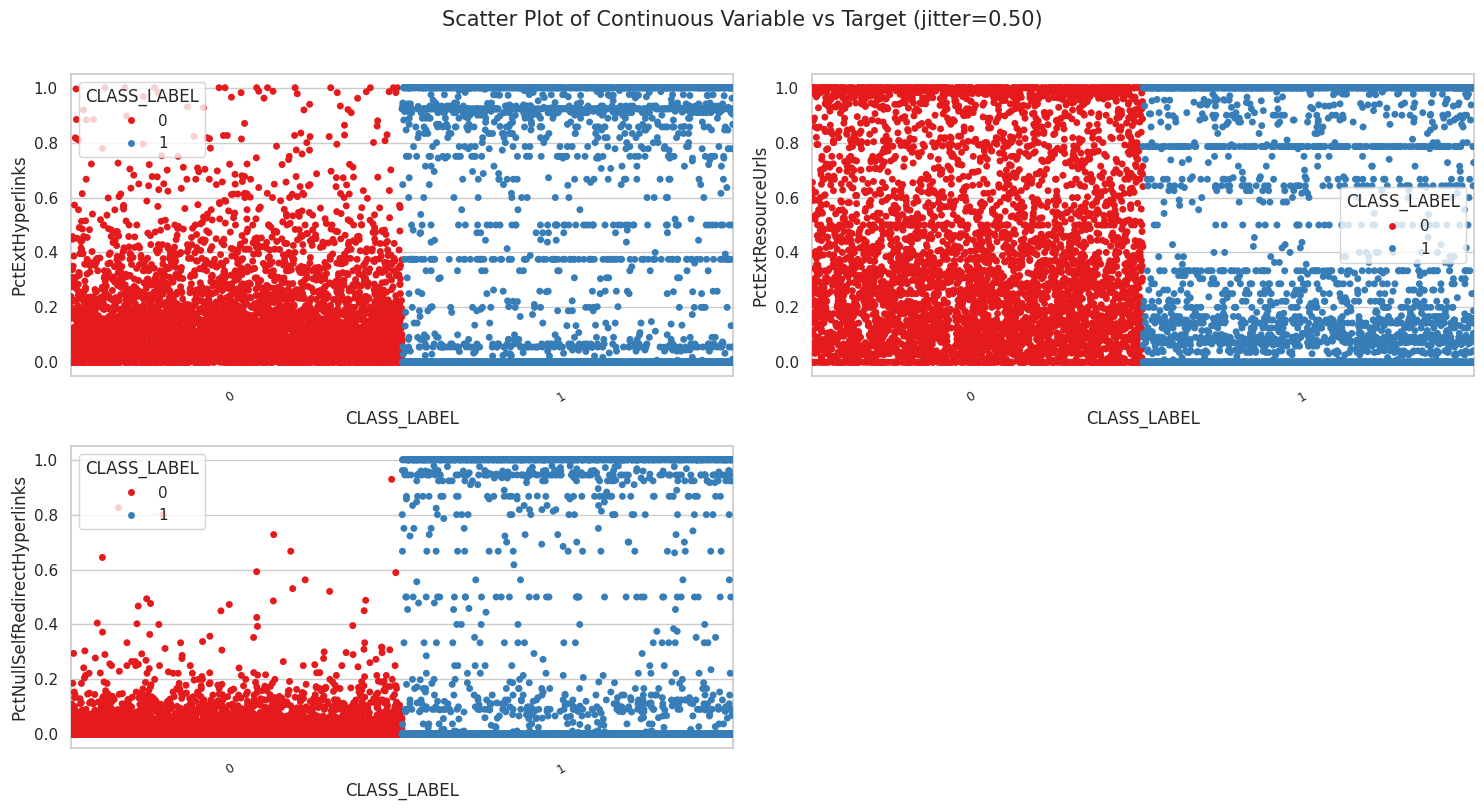

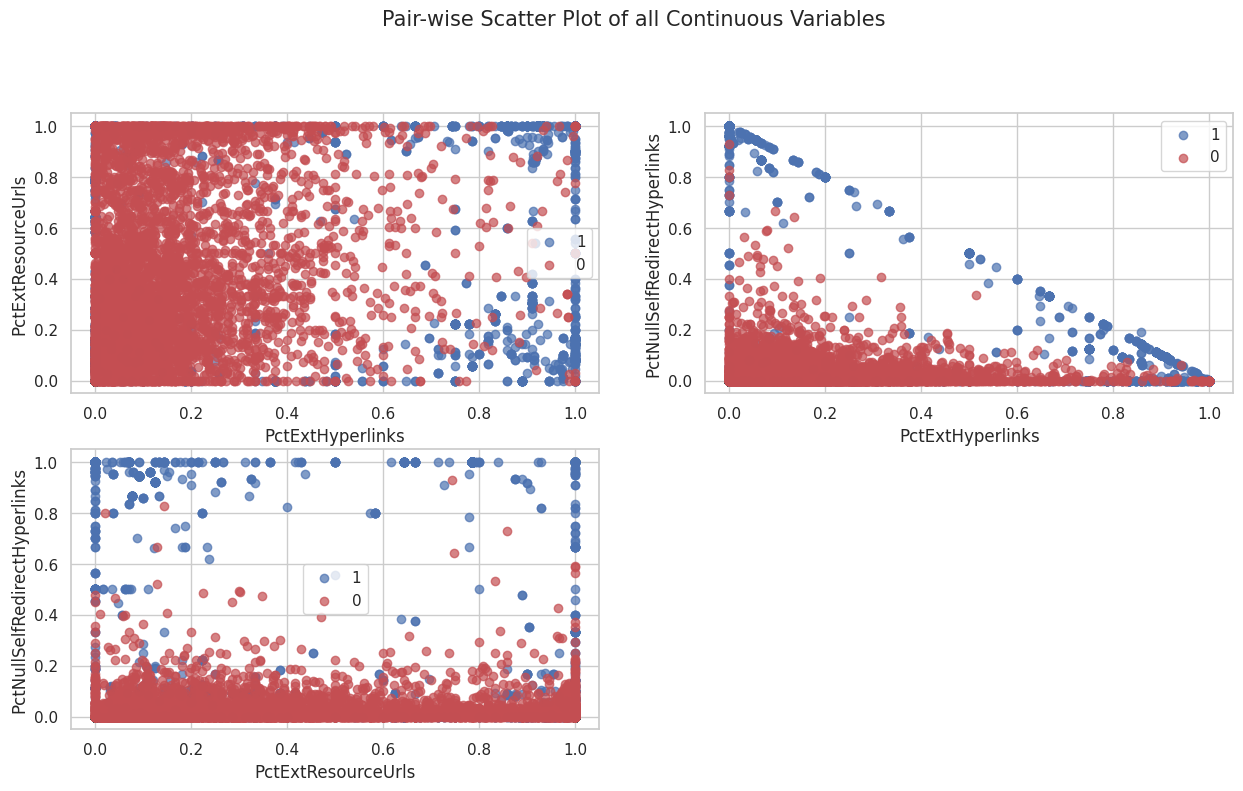

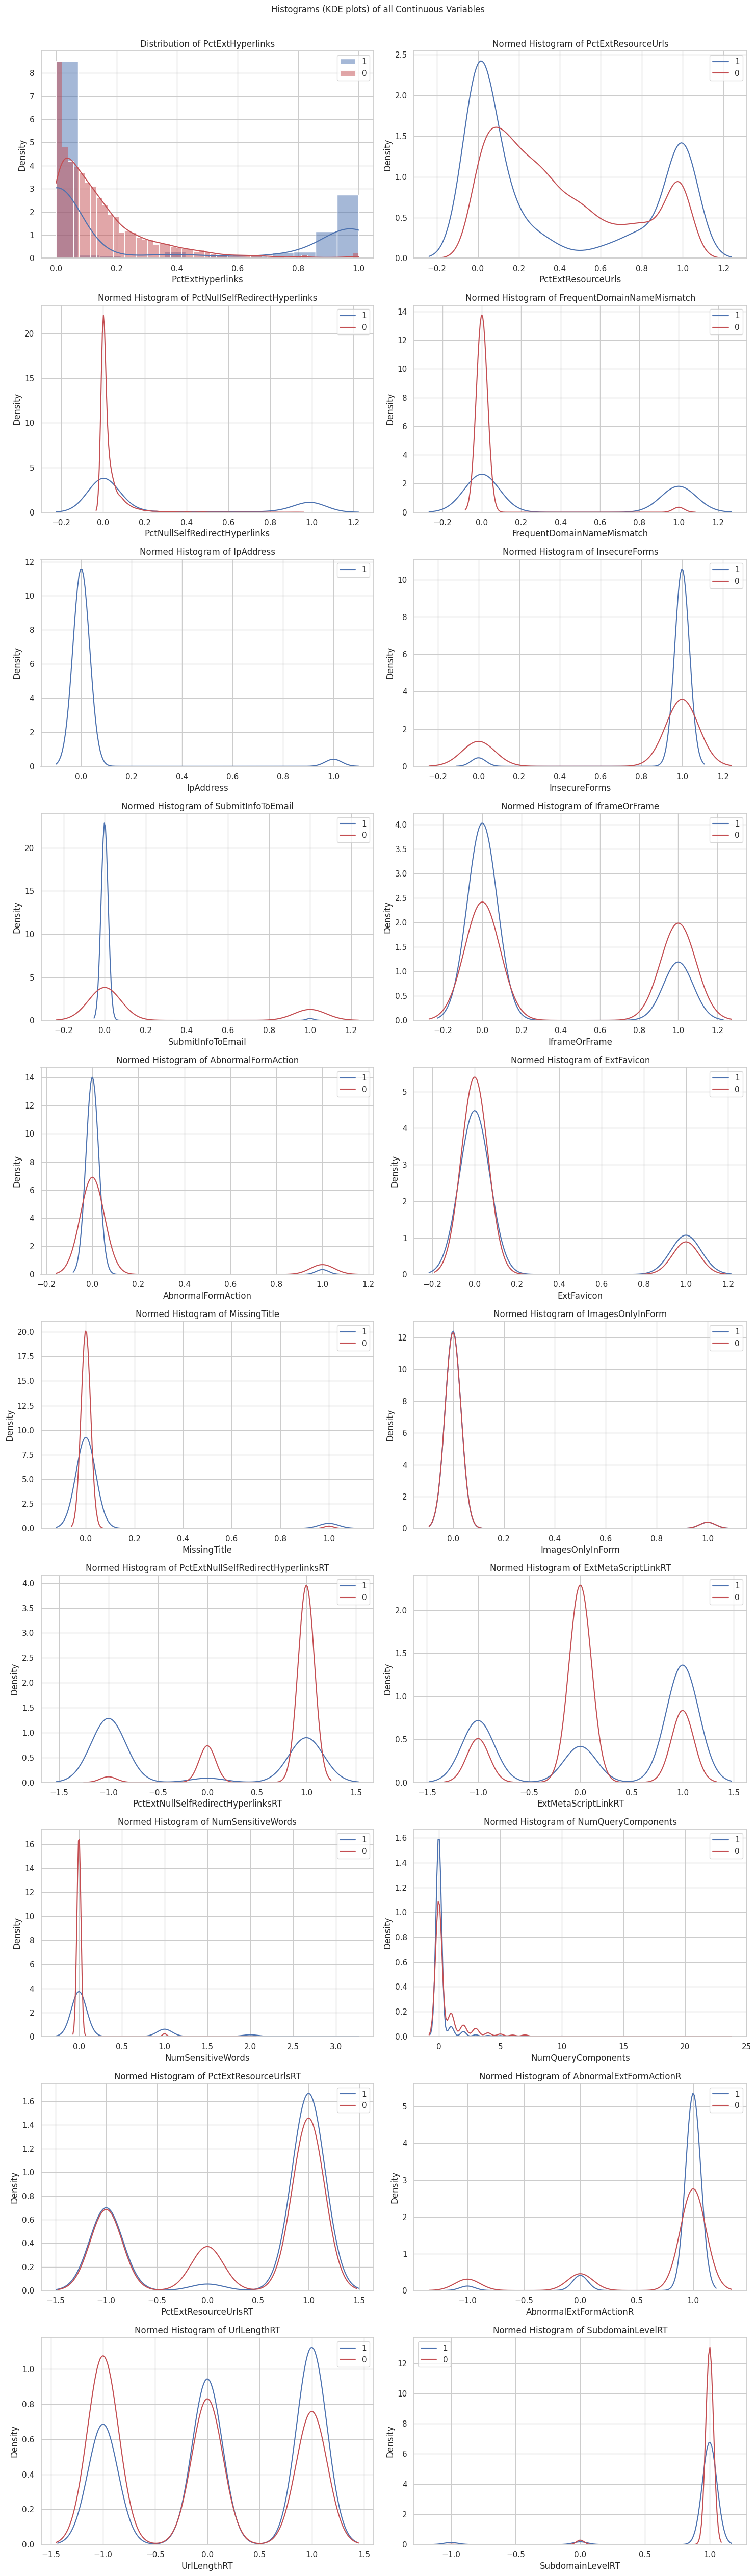

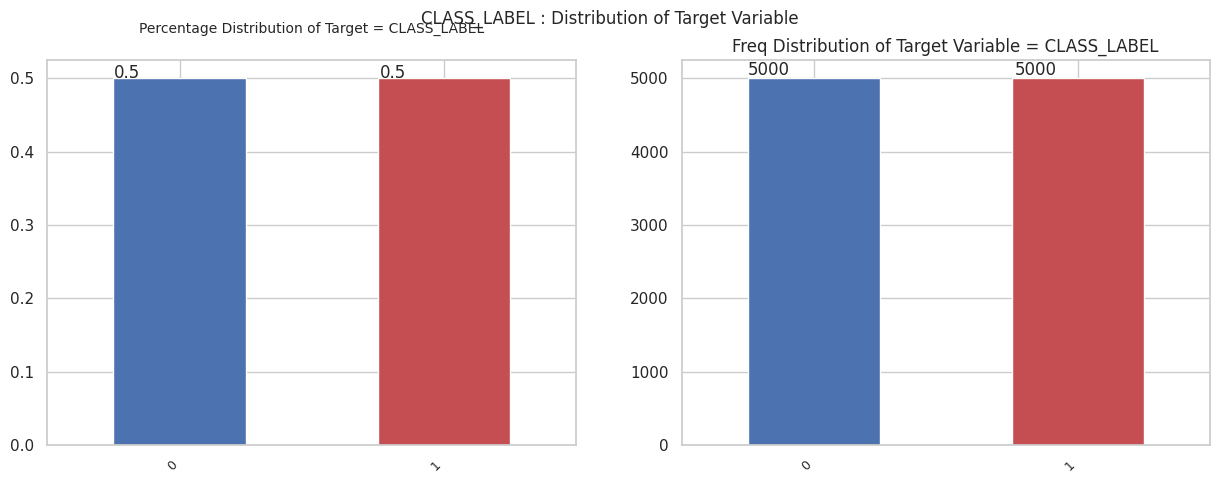

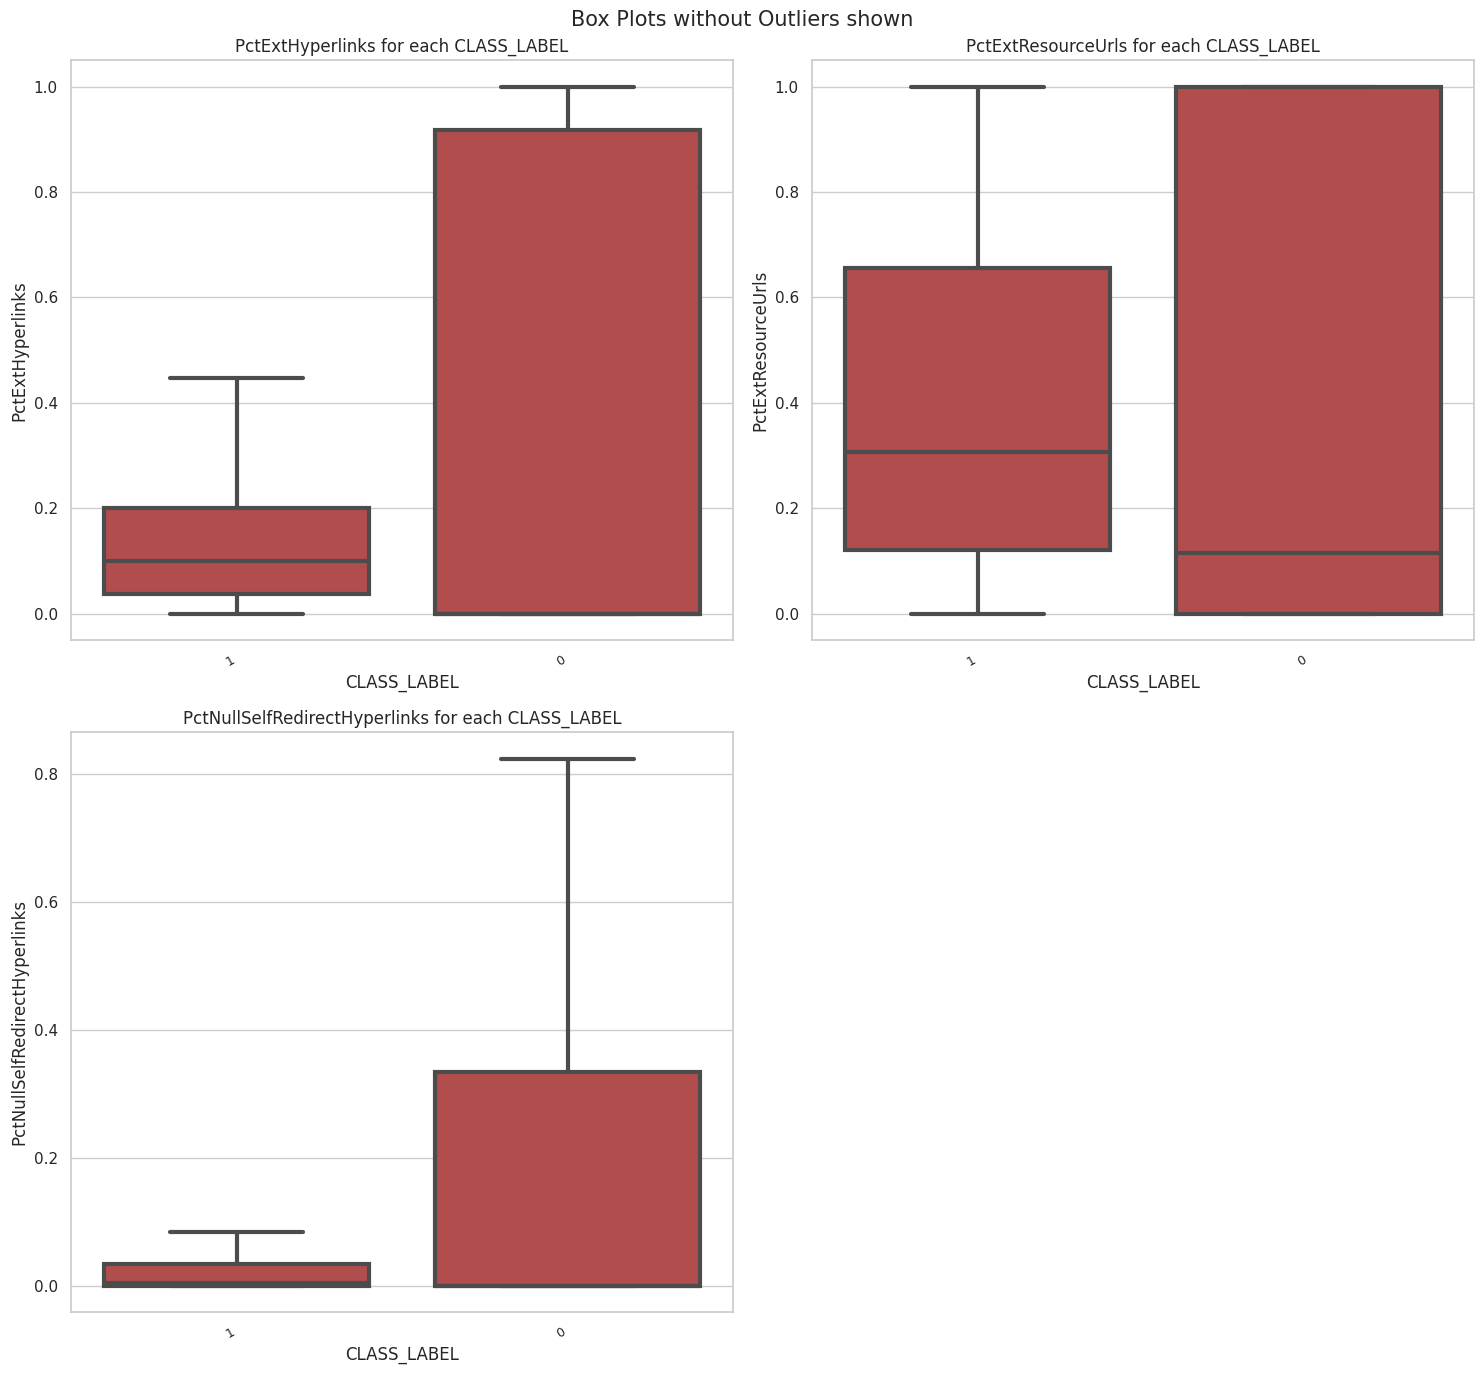

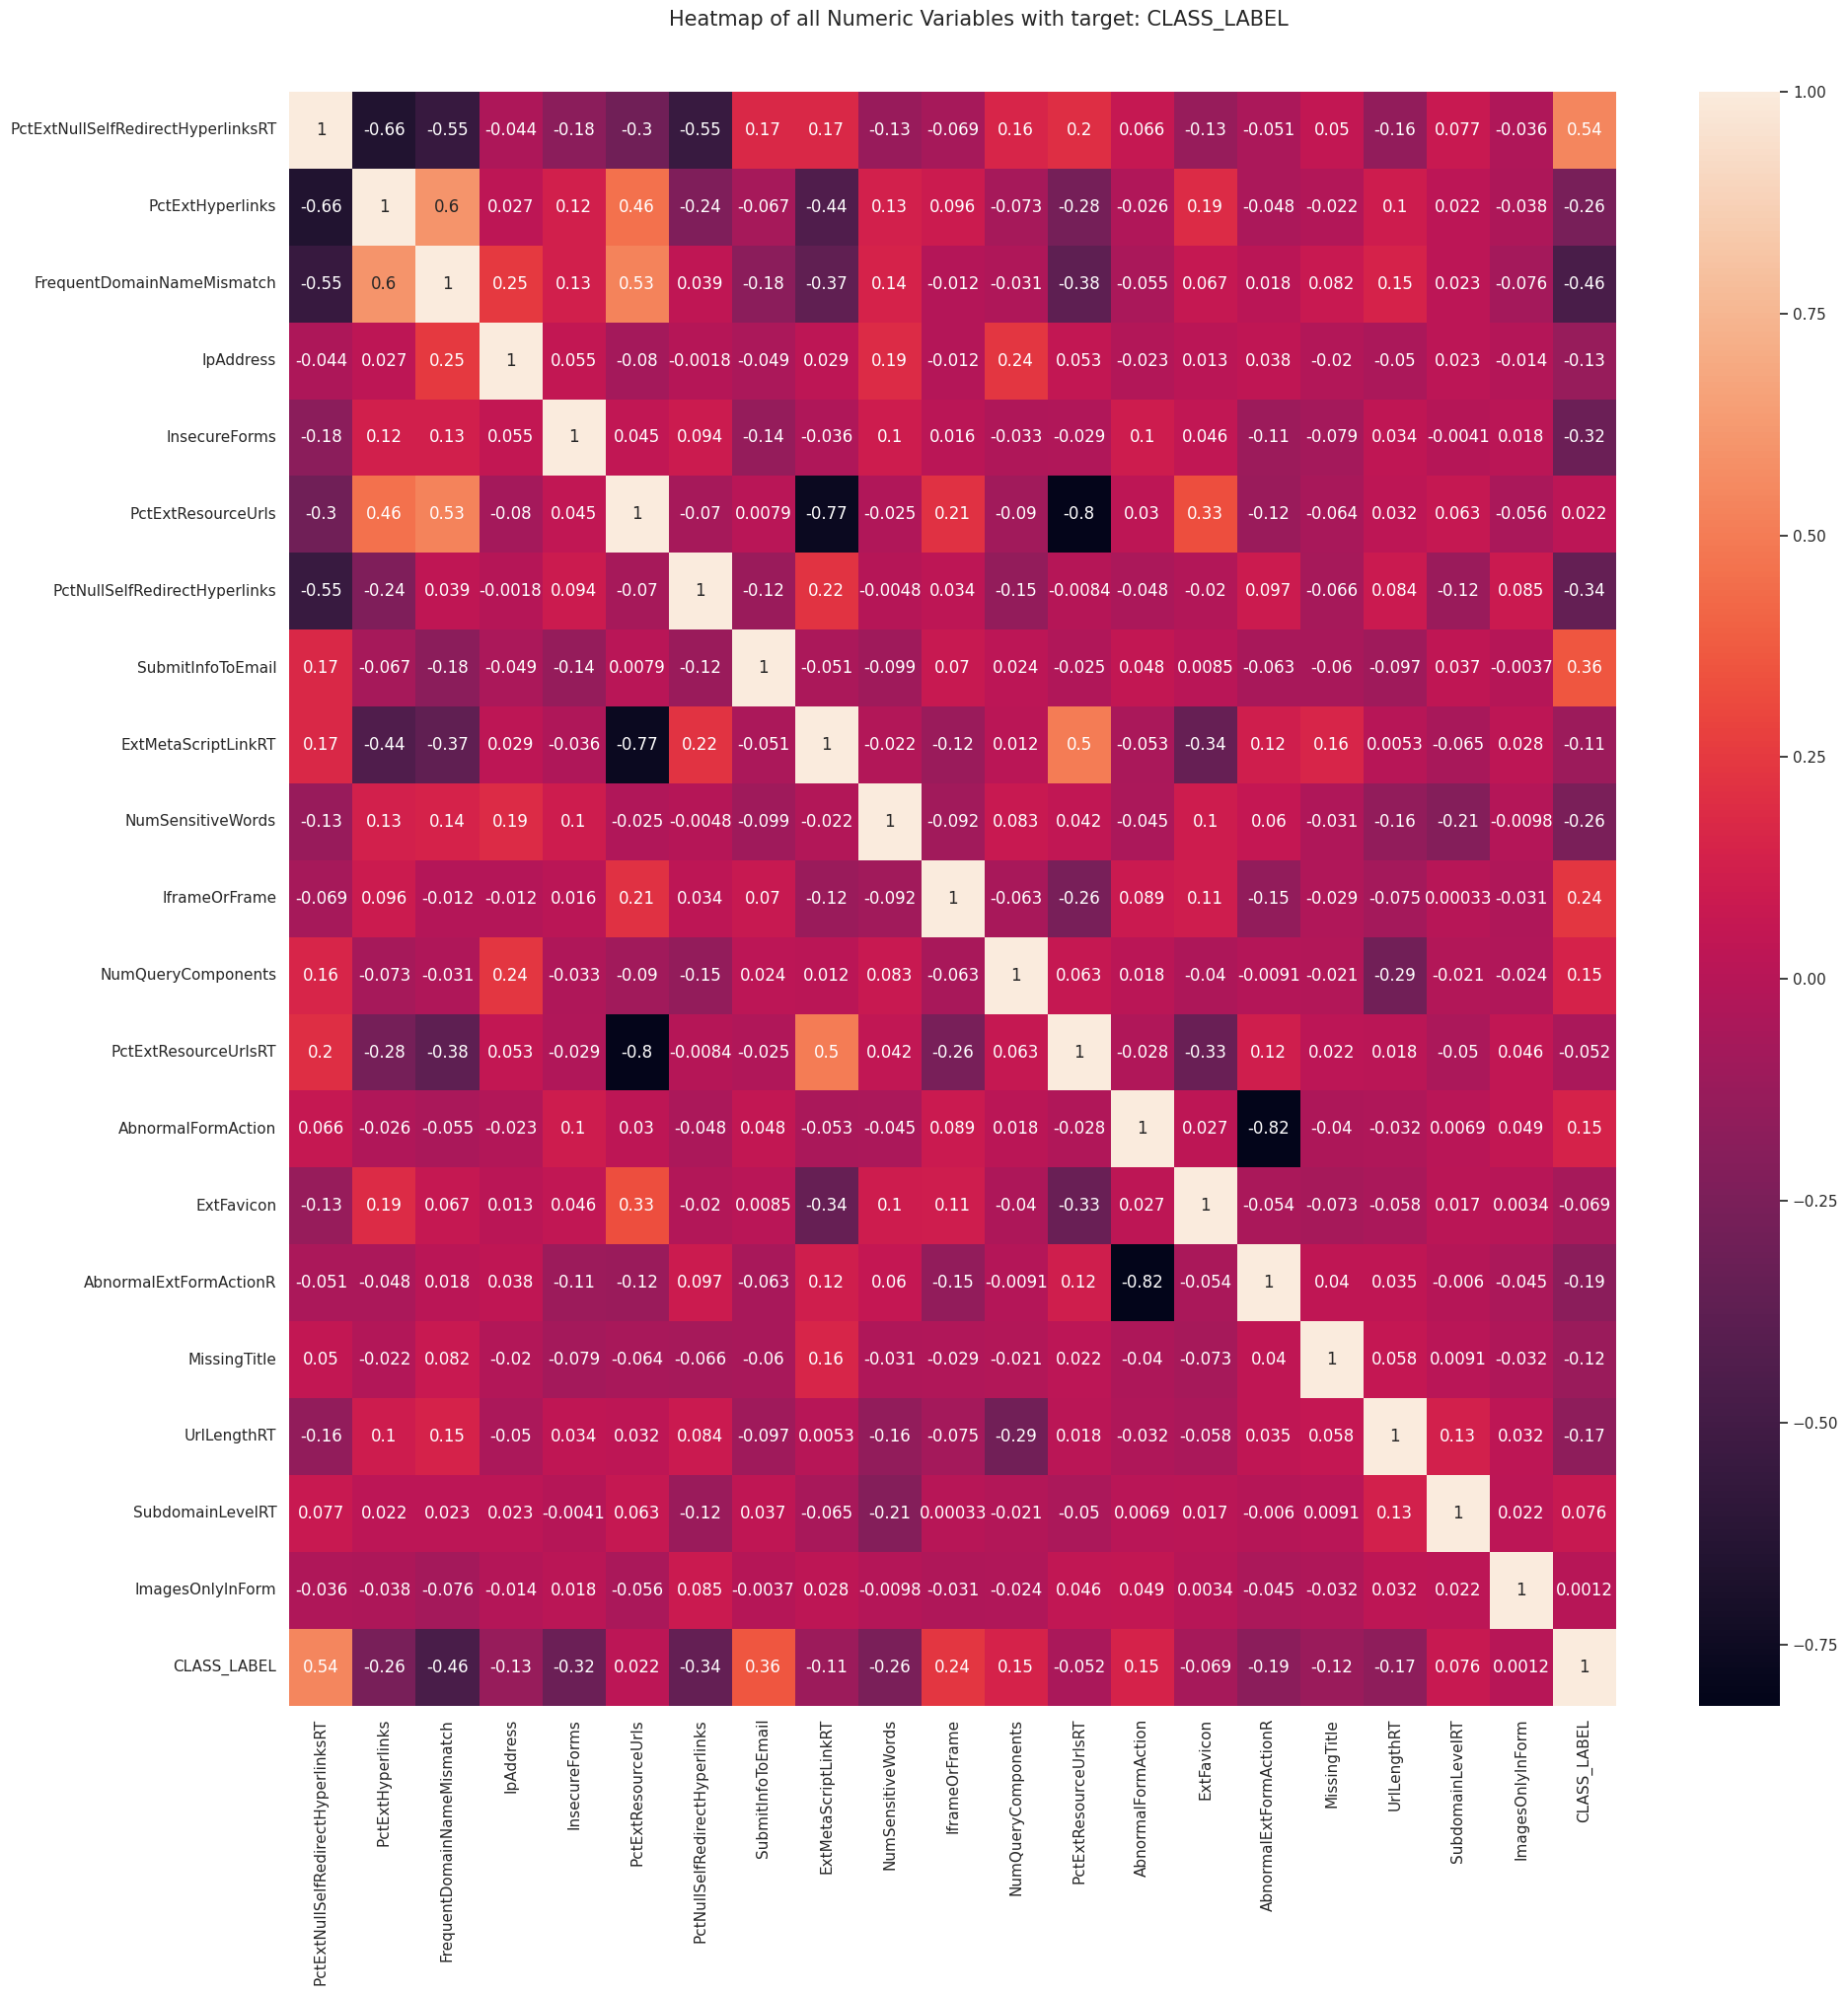

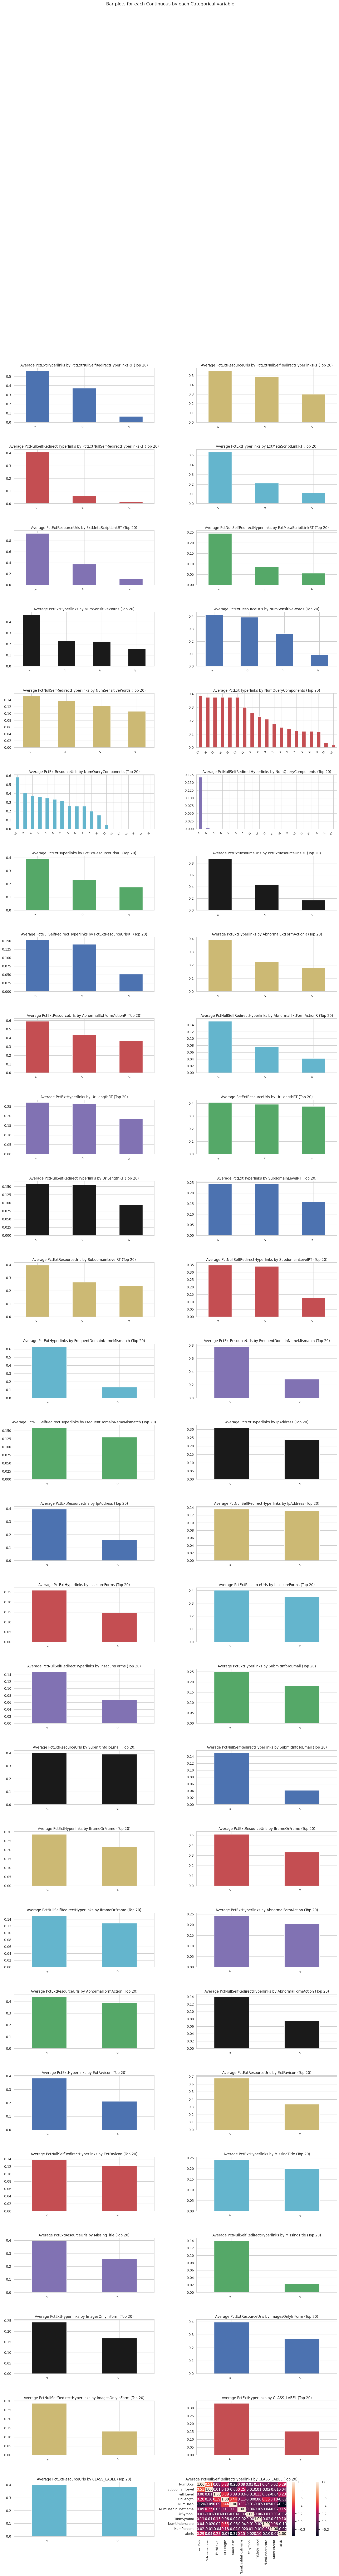

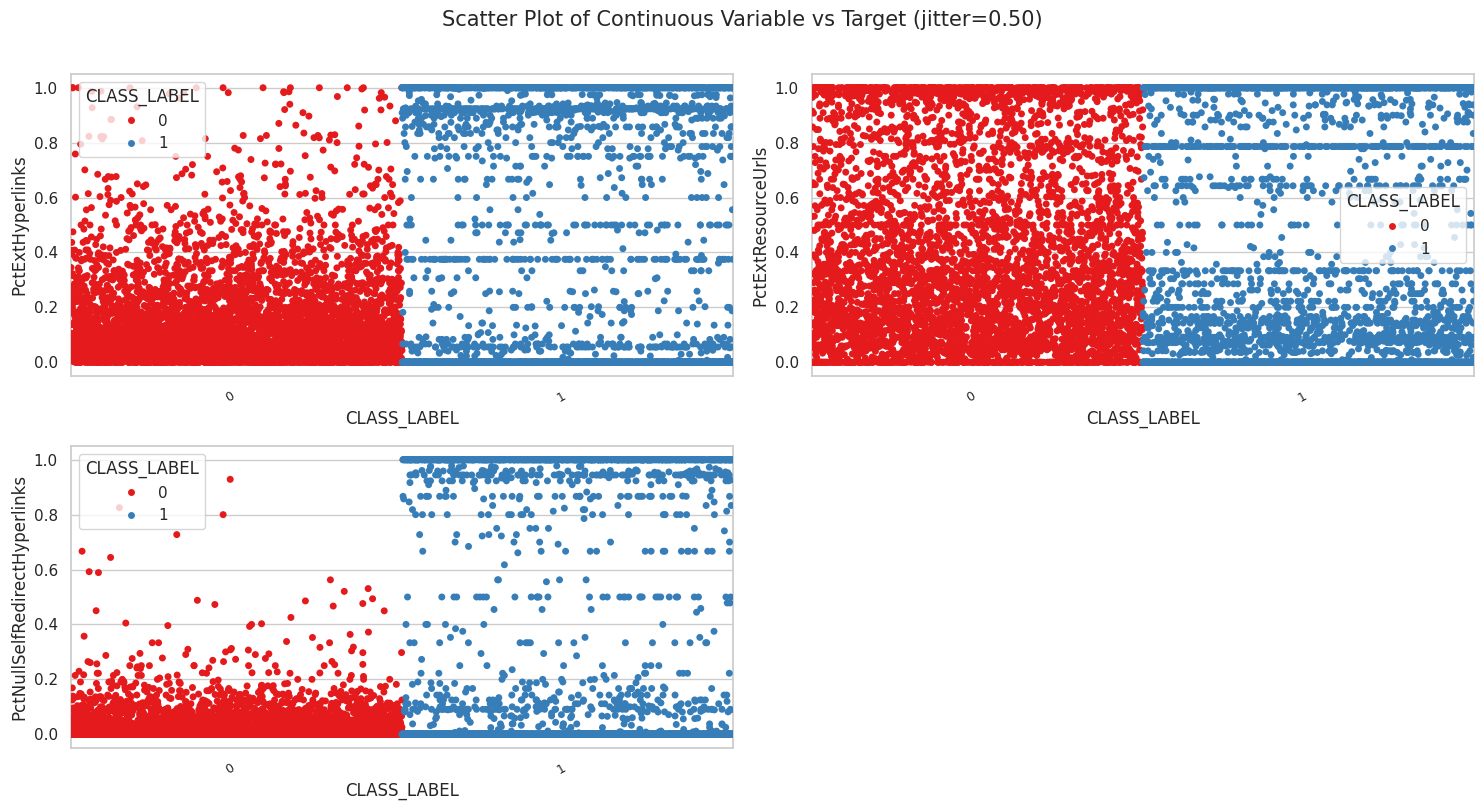

Total Number of Scatter Plots = 6


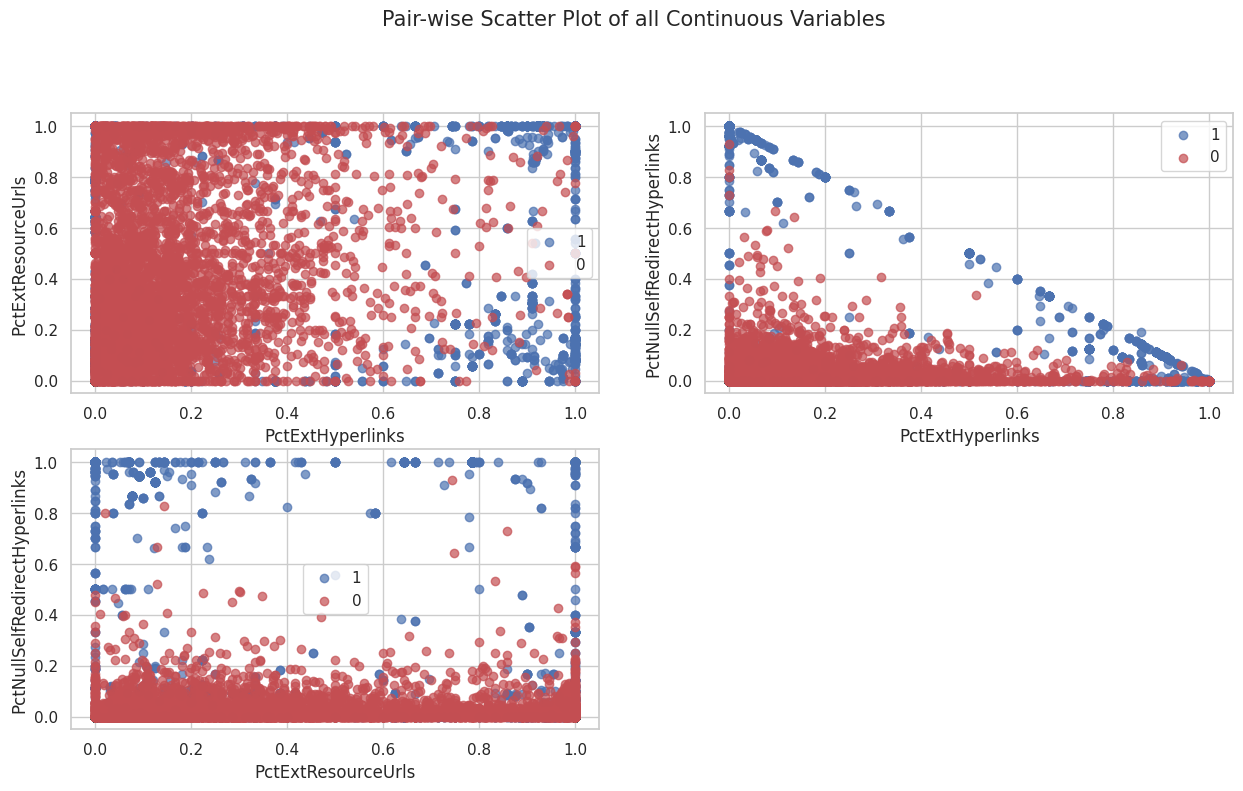

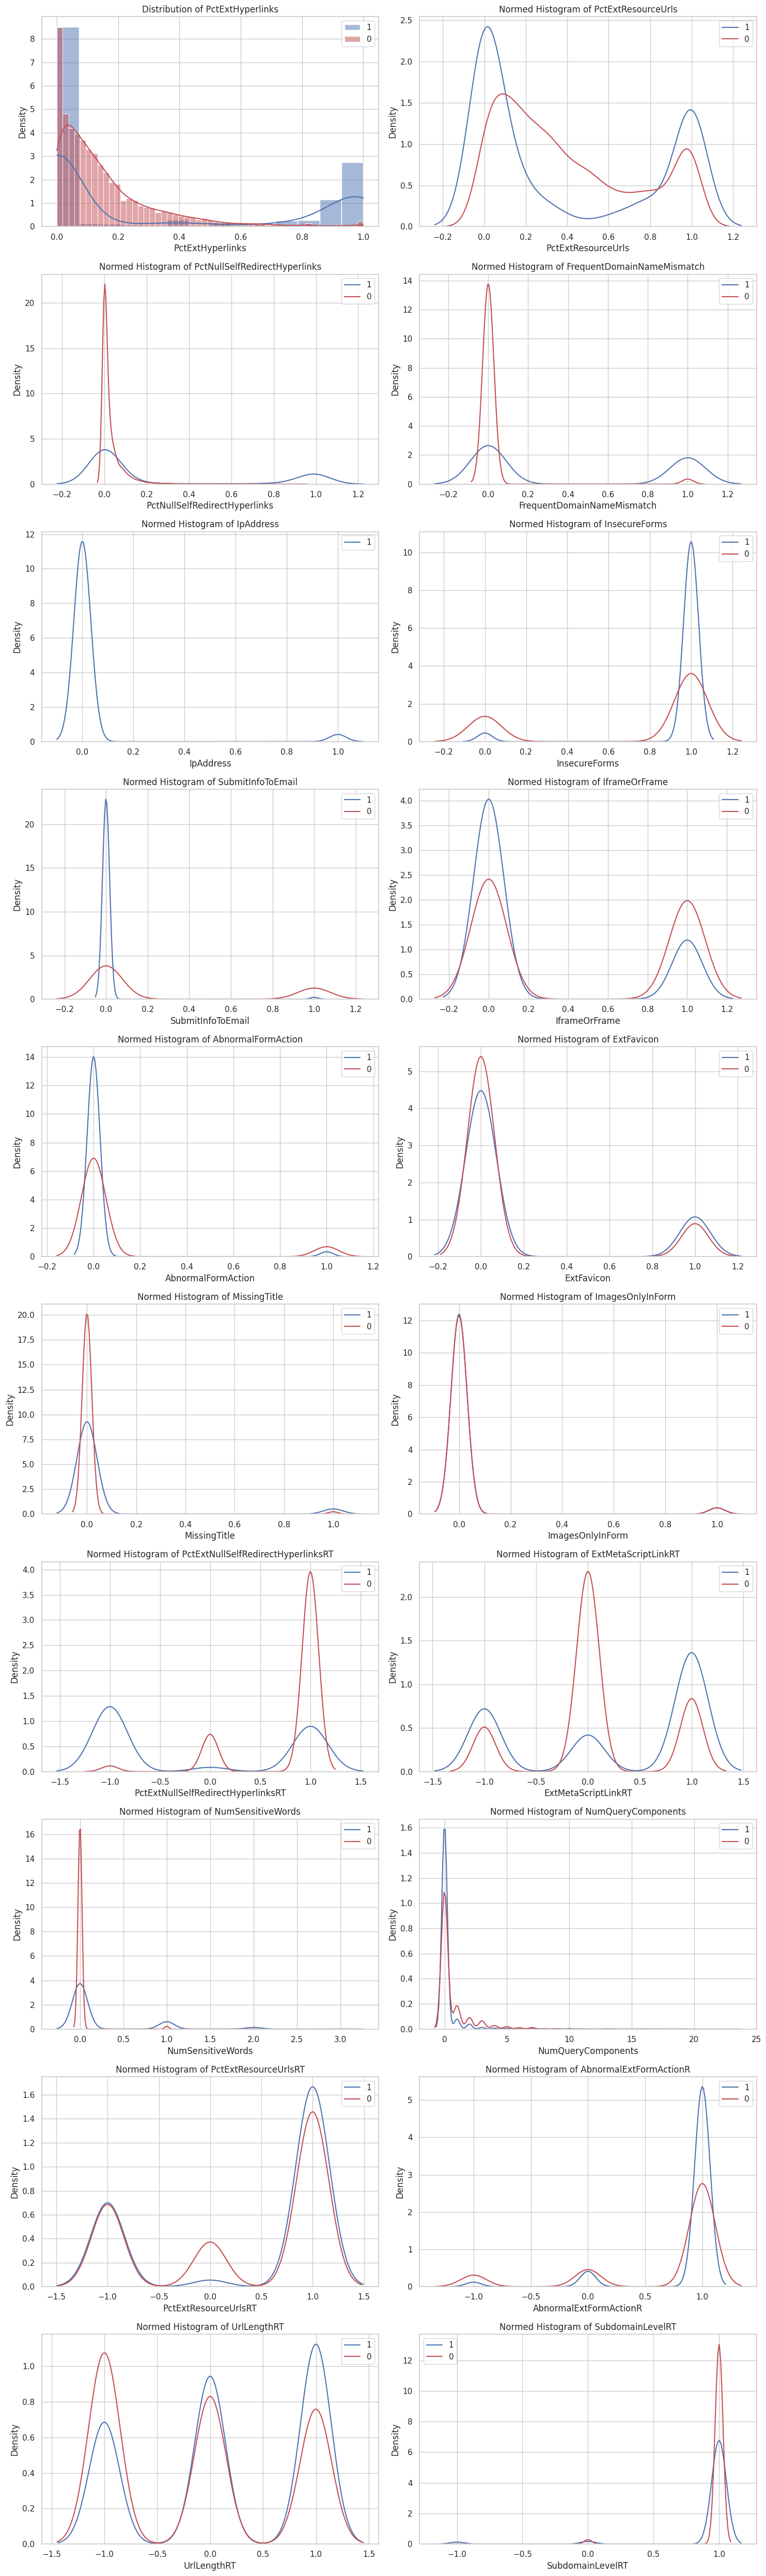

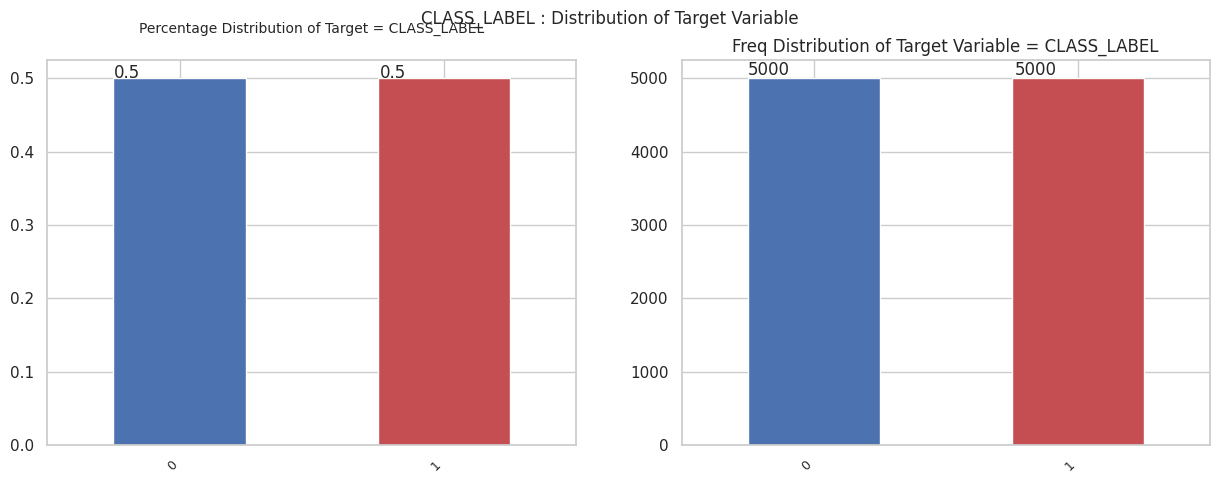

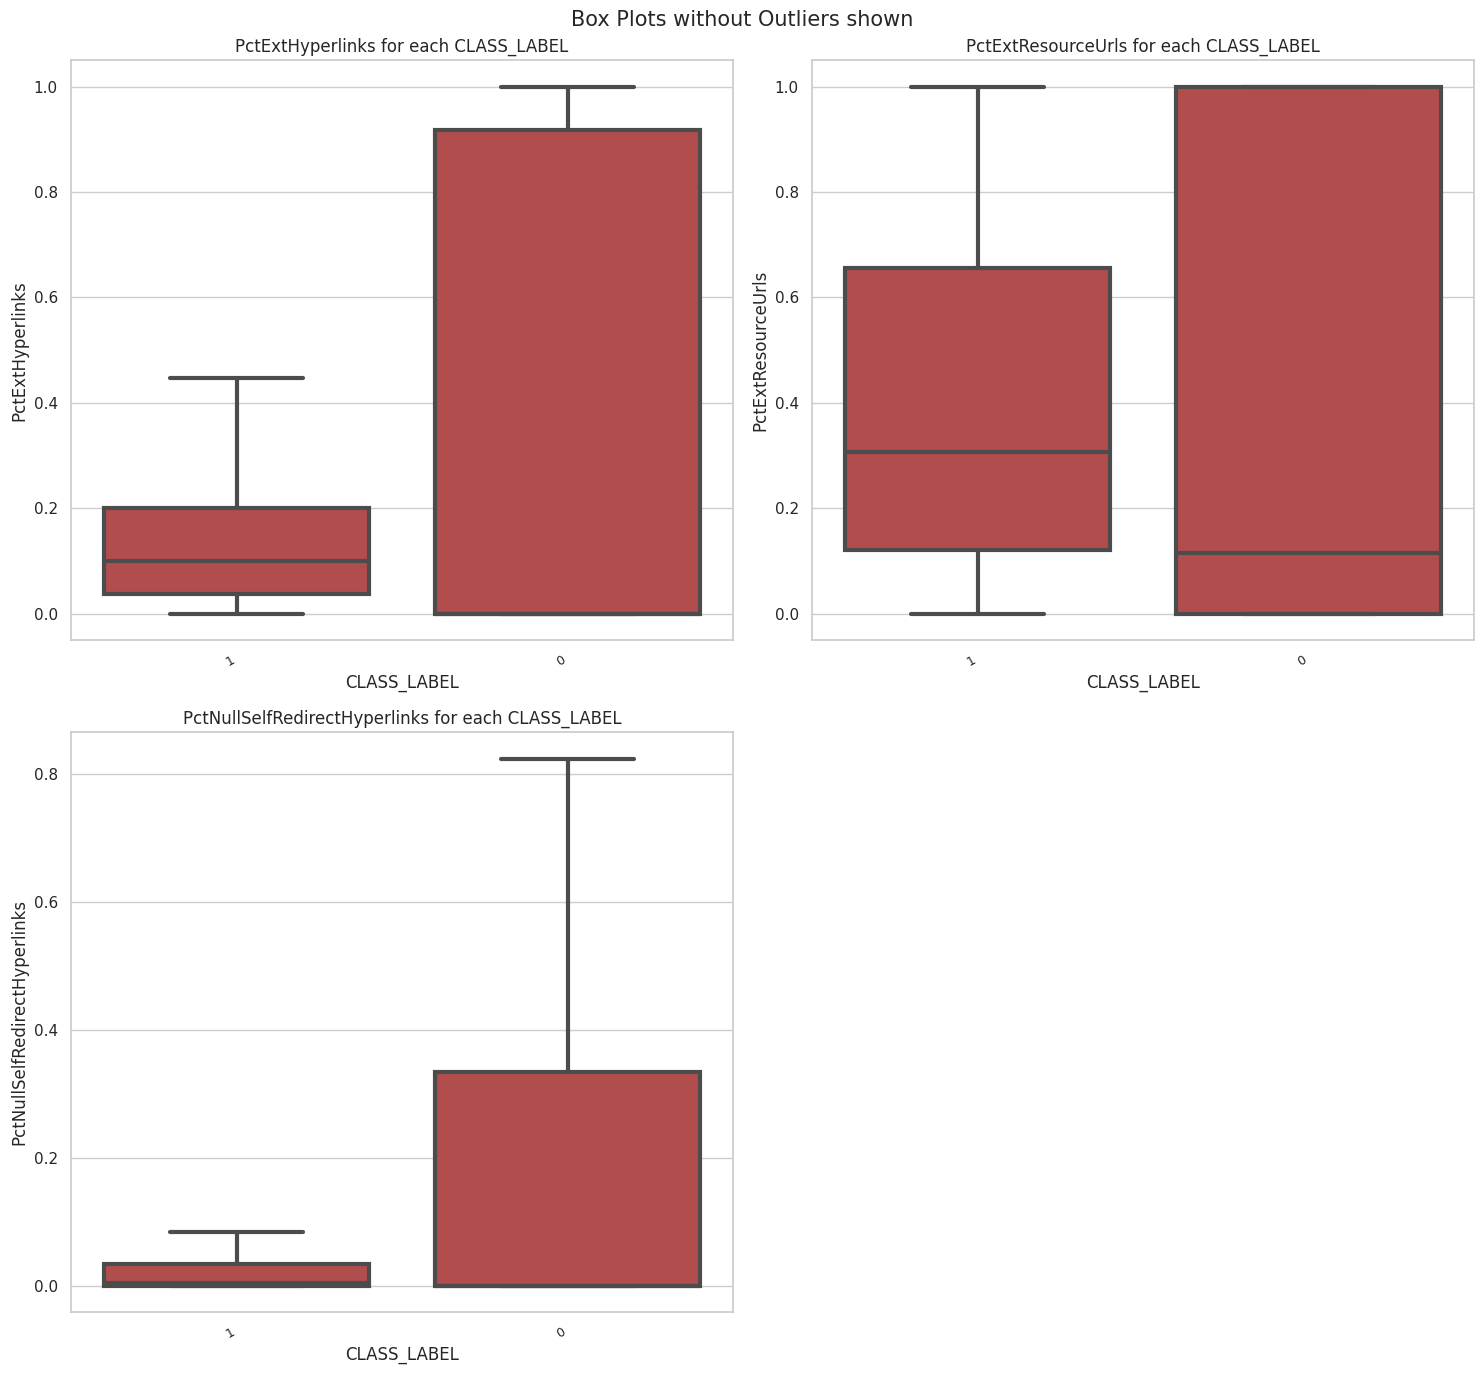

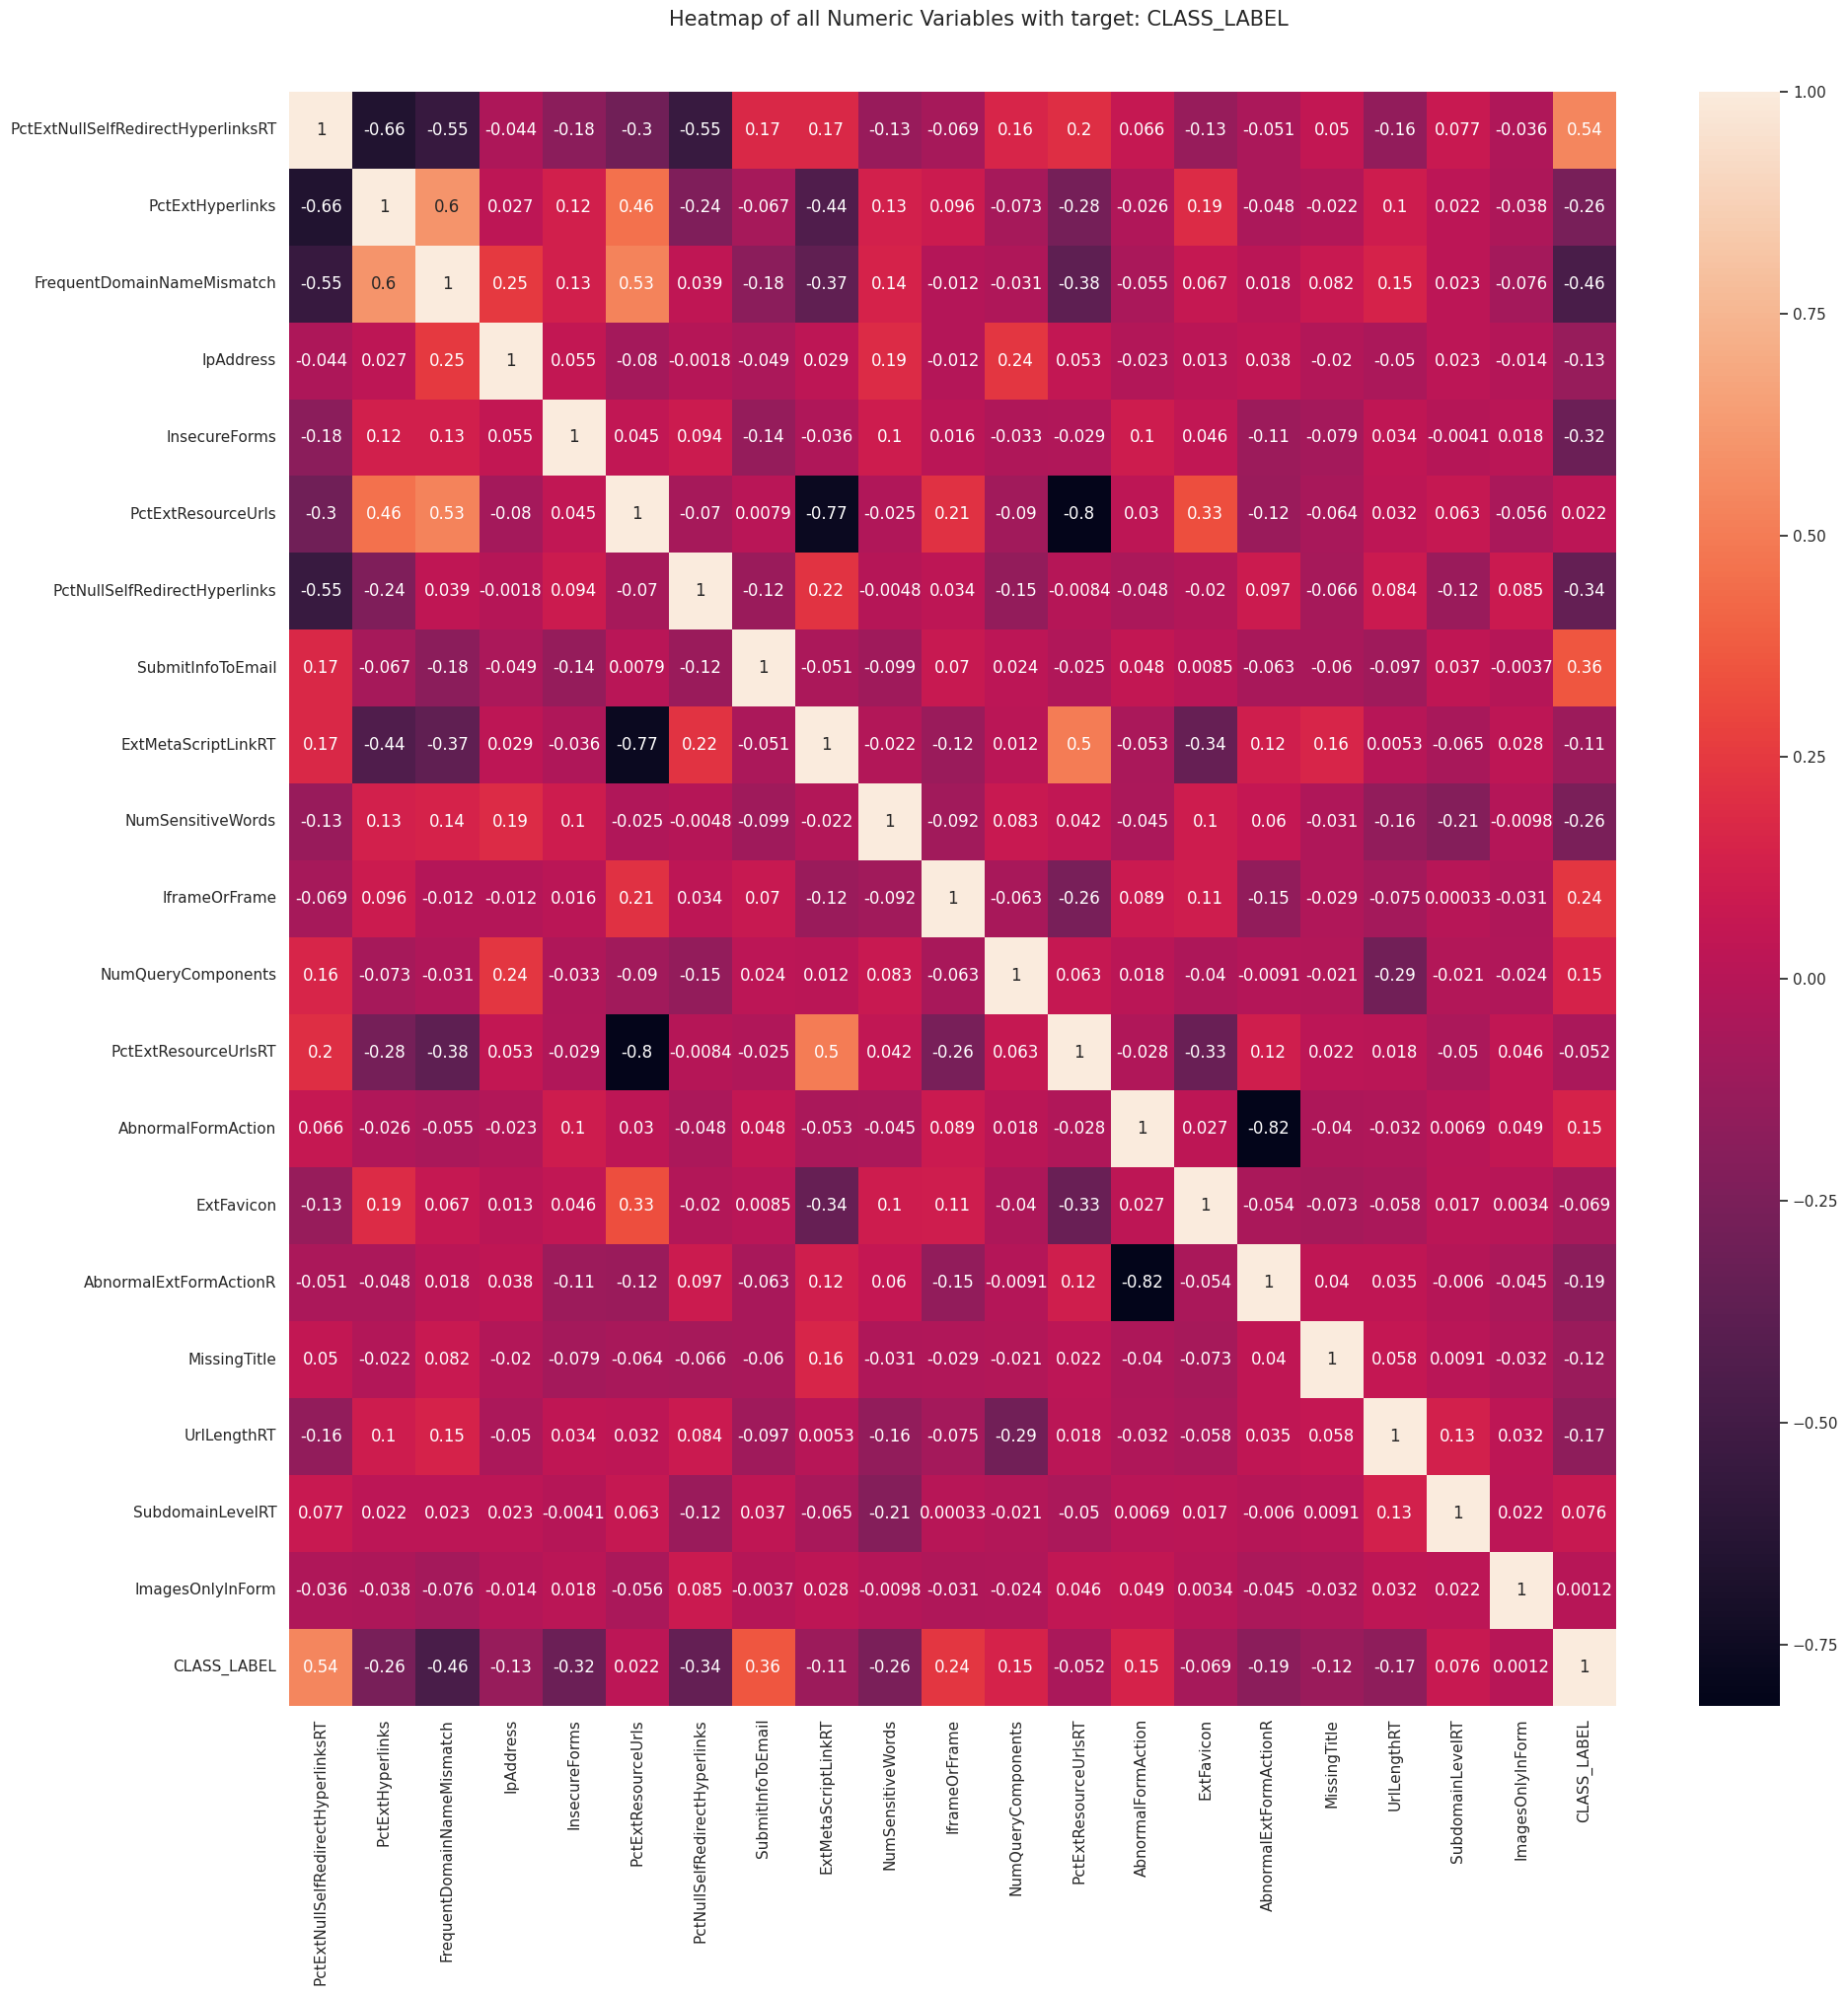

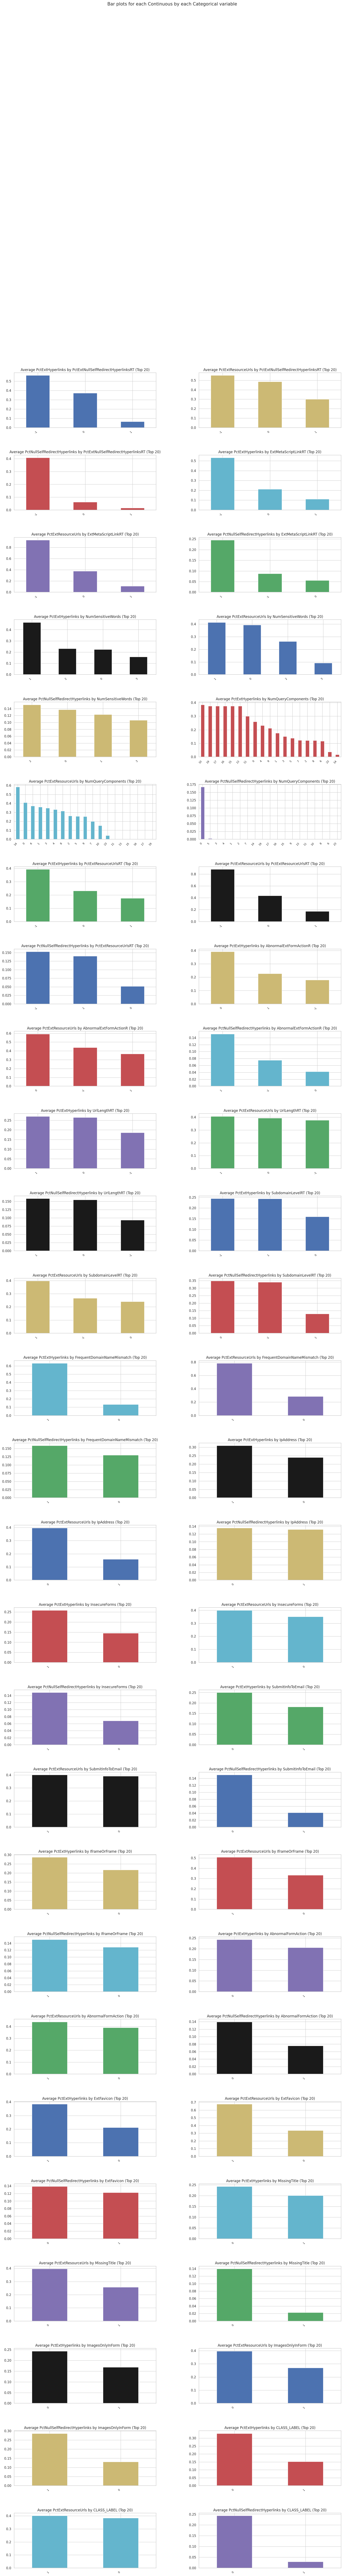

All Plots done
Time to run AutoViz = 60 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks  \
0                      1                      0.000000       
1                      1                      0.000000       
2                      0                      0.375000       
3                     -1                      1.000000       
4                     -1                      1.000000       
...                                  ...               ...   
9995                   1                      0.096774       
9996                   1                      0.161290       
9997                   1                      0.070423       
9998                   1                      0.166667       
9999                   1                      0.089623       

      FrequentDomainNameMismatch  IpAddress  InsecureForms  \
0                  0                  0            1         
1                  0                  0            1         
2                  0                  0            1         
3                  1                  0            1         
4                  1                  0            0         
...                          ...        ...            ...   
9995               0                  0            1         
9996               0                  0            1         
9997               0                  0            1         
9998               0                  0            1         
9999               0                  0            1         

      PctExtResourceUrls  PctNullSelfRedirectHyperlinks  SubmitInfoToEmail  \
0          0.250000                 0.000000                     0           
1          0.000000                 0.000000                     0           
2          1.000000                 0.000000                     0           
3          0.095238                 0.000000                     1           
4          1.000000                 0.000000                     0           
...                  ...                            ...                ...   
9995       0.757143                 0.000000                     0           
9996       0.275862                 0.129032                     0           
9997       0.500000                 0.056338                     0           
9998       0.428571                 0.000000                     0           
9999       0.042553                 0.004717                     0           

      ExtMetaScriptLinkRT  NumSensitiveWords  IframeOrFrame  \
0             -1                   0                0         
1              1                   1                0         
2             -1                   0                0         
3              1                   0                0         
4             -1                   0                1         
...                   ...                ...            ...   
9995           0                   0                0         
9996           0                   0                1         
9997           0                   0                0         
9998           0                   0                1         
9999           1                   0                0         

      NumQueryComponents  PctExtResourceUrlsRT  AbnormalFormAction  \
0              0                    1                    0           
1              2                    1                    0           
2              0                   -1                    0           
3              0                    1                    0           
4              0                   -1                    0           
...                  ...                   ...                 ...   
9995           2                   -1                    0           
9996           0                    0                    0           
9997           0                    1                    0           
9998           1                    0                    0           
9999           0                    1               

In [28]:
df_auto = AV.AutoViz("https://raw.githubusercontent.com/ektanegi25/Phishing-Classifier/main/Phishing_Legitimate_full.csv", depVar = 'CLASS_LABEL')
df_auto

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [30]:
float_cols = df.select_dtypes('float64').columns
for i in float_cols:
    df[i] = df[i].astype('float32')

int_cols = df.select_dtypes('int64').columns
for i in int_cols:
    df[i] = df[i].astype('int32')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int32  
 1   SubdomainLevel                      10000 non-null  int32  
 2   PathLevel                           10000 non-null  int32  
 3   UrlLength                           10000 non-null  int32  
 4   NumDash                             10000 non-null  int32  
 5   NumDashInHostname                   10000 non-null  int32  
 6   AtSymbol                            10000 non-null  int32  
 7   TildeSymbol                         10000 non-null  int32  
 8   NumUnderscore                       10000 non-null  int32  
 9   NumPercent                          10000 non-null  int32  
 10  NumQueryComponents                  10000 non-null  int32  
 11  NumAmpersand                        10000 

In [32]:
df.rename(columns = {'CLASS_LABEL': 'labels' }, inplace = True)

In [33]:
df.sample(10)

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
4261     2            0            3          54        0      
6260     4            2            2          95        0      
7458     2            0            5          73        1      
1685     3            1            3          52        0      
4518     3            0            3          39        0      
2910     2            1            8          60        0      
2305     2            0            3          43        0      
6283     3            0            2          61        1      
6129     3            1            3         106        8      
4757     3            1            4          66        1      

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
4261          0              0          0             0             0       
6260          0              0          0             1             0       
7458          0              0          0             1             0       
1685          0              0          0             0             0       
4518          0              0          0             0             0       
2910          0              0          0             0             0       
2305          0              0          0             0             0       
6283          1              0          0             0             0       
6129          0              0          0             0             0       
4757          0              0          0             1             0       

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
4261           0                0          0            0            1      
6260           3                2          0           10            1      
7458           0                0          0           16            1      
1685           0                0          0            0            1      
4518           0                0          0            0            1      
2910           0                0          0            0            1      
2305           0                0          0            0            1      
6283           1                0          0           11            1      
6129           0                0          0            7            1      
4757           0                0          0            0            1      

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
4261        0           0               0                1         
6260        1           0               0                0         
7458        1           0               0                0         
1685        0           0               0                0         
4518        0           0               0                1         
2910        1           0               0                0         
2305        0           0               0                1         
6283        1           0               0                0         
6129        1           0               0                1         
4757        0           0               0                1         

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
4261         0               20            27           0        
6260         0               26            18          43        
7458         0               18            48           0        
1685         0               22            23           0        
4518         0               10            22           0        
2910         0               21            32           0        
2305         0               15            21           0        
6283         0               14            18          21        
6129         0               24            75           0        
4757         0               17            42           0        

      DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  \
4261          0                  0                  0           

In [34]:
df.describe()

NumDots    SubdomainLevel    PathLevel     UrlLength      NumDash    \
count  10000.000000   10000.000000   10000.000000  10000.000000  10000.000000   
mean       2.445100       0.586800       3.300300     70.264100      1.818000   
std        1.346836       0.751214       1.863241     33.369877      3.106258   
min        1.000000       0.000000       0.000000     12.000000      0.000000   
25%        2.000000       0.000000       2.000000     48.000000      0.000000   
50%        2.000000       1.000000       3.000000     62.000000      0.000000   
75%        3.000000       1.000000       4.000000     84.000000      2.000000   
max       21.000000      14.000000      18.000000    253.000000     55.000000   

       NumDashInHostname    AtSymbol     TildeSymbol  NumUnderscore  \
count    10000.000000     10000.000000  10000.000000   10000.00000    
mean         0.138900         0.000300      0.013100       0.32320    
std          0.545744         0.017319      0.113709       1.11466    
min          0.000000         0.000000      0.000000       0.00000    
25%          0.000000         0.000000      0.000000       0.00000    
50%          0.000000         0.000000      0.000000       0.00000    
75%          0.000000         0.000000      0.000000       0.00000    
max          9.000000         1.000000      1.000000      18.00000    

        NumPercent   NumQueryComponents  NumAmpersand     NumHash    \
count  10000.000000     10000.000000     10000.000000  10000.000000   
mean       0.073800         0.458600         0.277200      0.002300   
std        0.622248         1.344793         1.117356      0.047906   
min        0.000000         0.000000         0.000000      0.000000   
25%        0.000000         0.000000         0.000000      0.000000   
50%        0.000000         0.000000         0.000000      0.000000   
75%        0.000000         0.000000         0.000000      0.000000   
max       19.000000        23.000000        22.000000      1.000000   

       NumNumericChars     NoHttps    RandomString    IpAddress   \
count   10000.000000    10000.000000   10000.00000  10000.000000   
mean        5.810300        0.988800       0.52520      0.017200   
std         9.617877        0.105241       0.49939      0.130023   
min         0.000000        0.000000       0.00000      0.000000   
25%         0.000000        1.000000       0.00000      0.000000   
50%         2.000000        1.000000       1.00000      0.000000   
75%         8.000000        1.000000       1.00000      0.000000   
max       111.000000        1.000000       1.00000      1.000000   

       DomainInSubdomains  DomainInPaths  HttpsInHostname  HostnameLength  \
count     10000.000000     10000.000000       10000.0        10000.00000    
mean          0.022200         0.428900           0.0           18.82430    
std           0.147341         0.494944           0.0            8.11654    
min           0.000000         0.000000           0.0            4.00000    
25%           0.000000         0.000000           0.0           14.00000    
50%           0.000000         0.000000           0.0           18.00000    
75%           0.000000         1.000000           0.0           22.00000    
max           1.000000         1.000000           0.0          137.00000    

        PathLength    QueryLength  DoubleSlashInPath  NumSensitiveWords  \
count  10000.000000  10000.000000    10000.000000       10000.000000      
mean      35.564900      8.606500        0.000900           0.109300      
std       24.588502     24.313053        0.029988           0.368737      
min        0.000000      0.000000        0.000000           0.000000      
25%       18.000000      0.000000        0.000000           0.000000      
50%       30.000000      0.000000        0.000000           0.000000      
75%       48.000000      0.000000        0.000000           0.000000      
max      161.000000    188.000000        1.000000           3.000000      

       EmbeddedBr

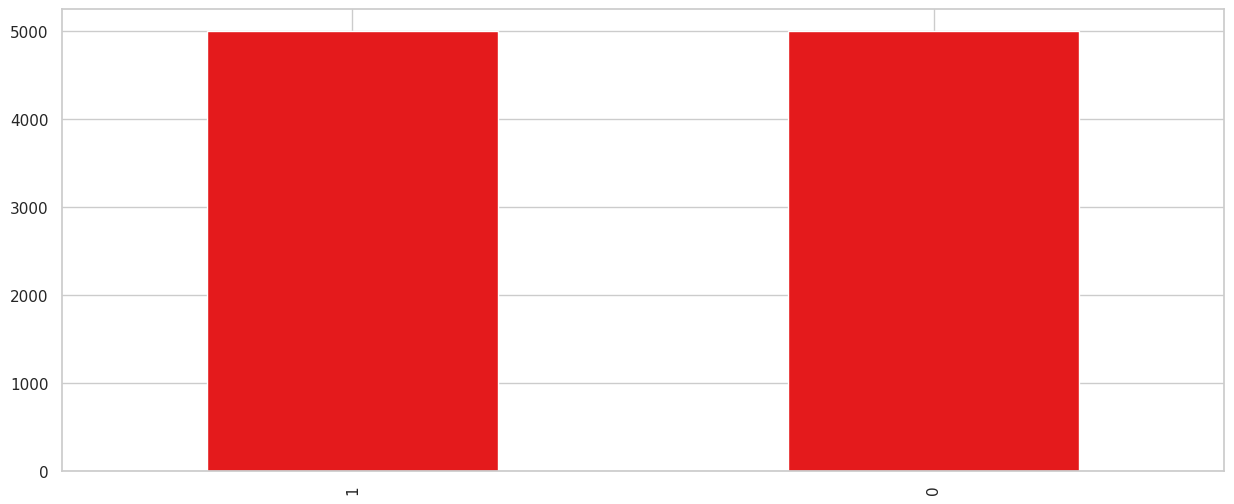

In [35]:
df['labels'].value_counts().plot(kind = 'bar')
plt.show()

**Finding Correlation through a heatmap between the features**

In [36]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

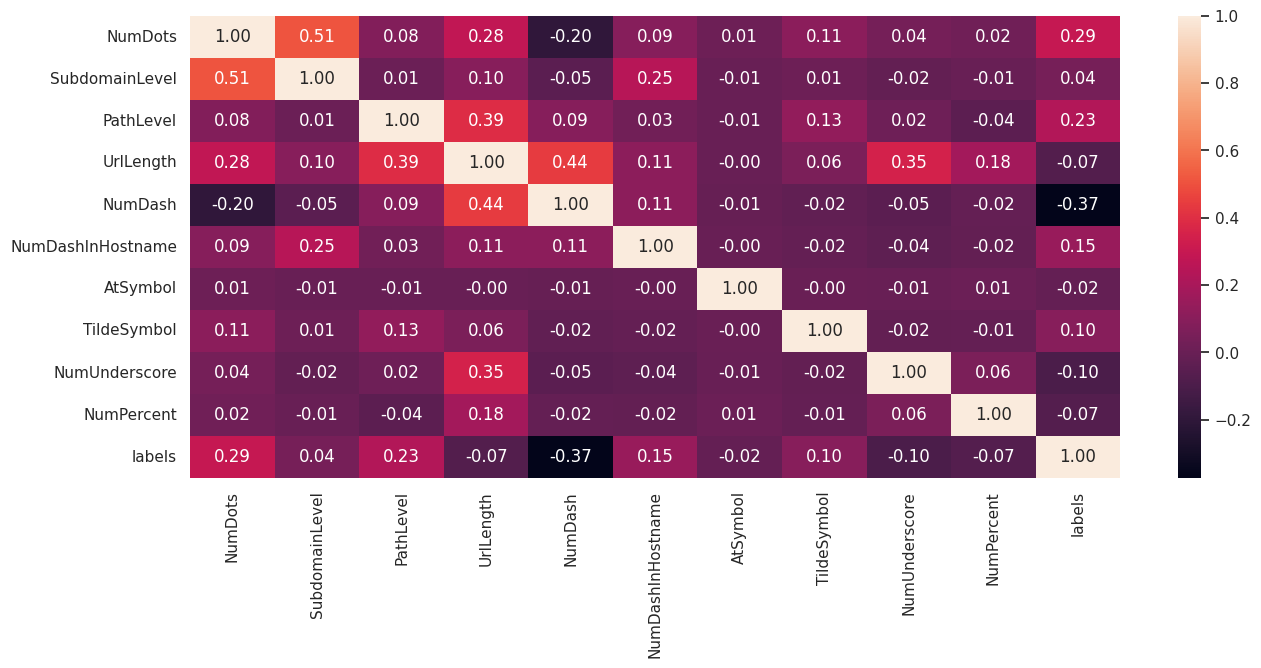

In [37]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] =(15,6)
corr_heatmap(df, 0, 10)

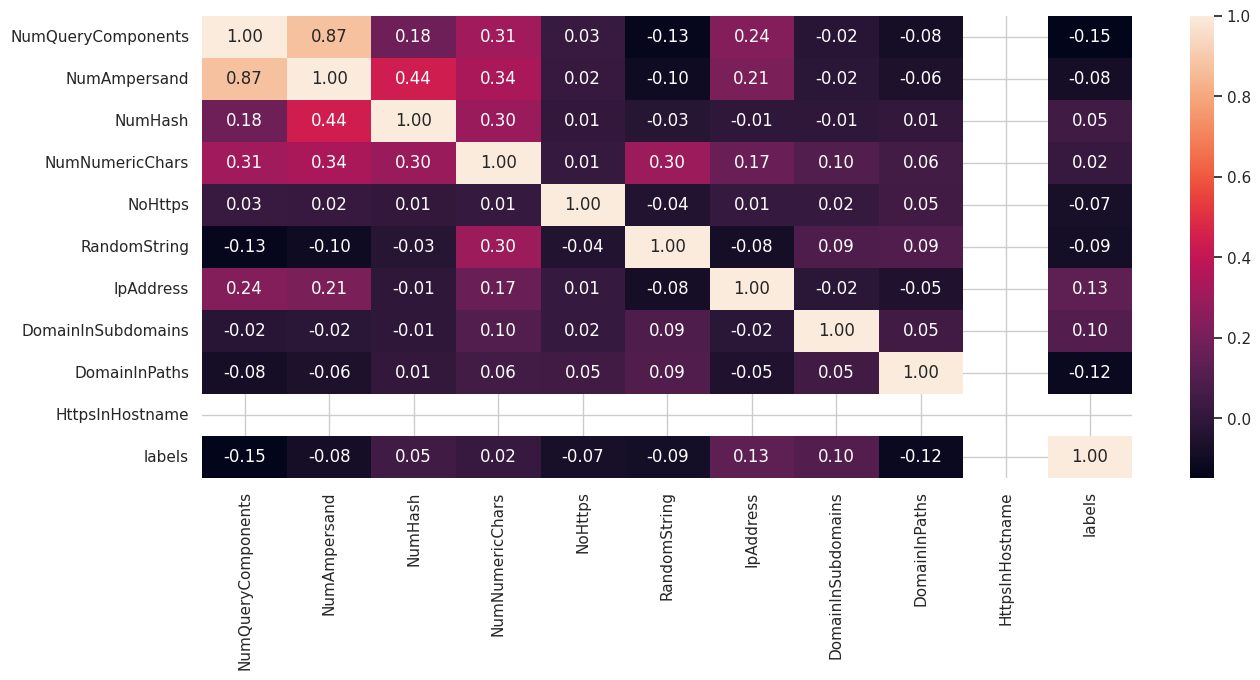

In [38]:
corr_heatmap(df, 10, 20)

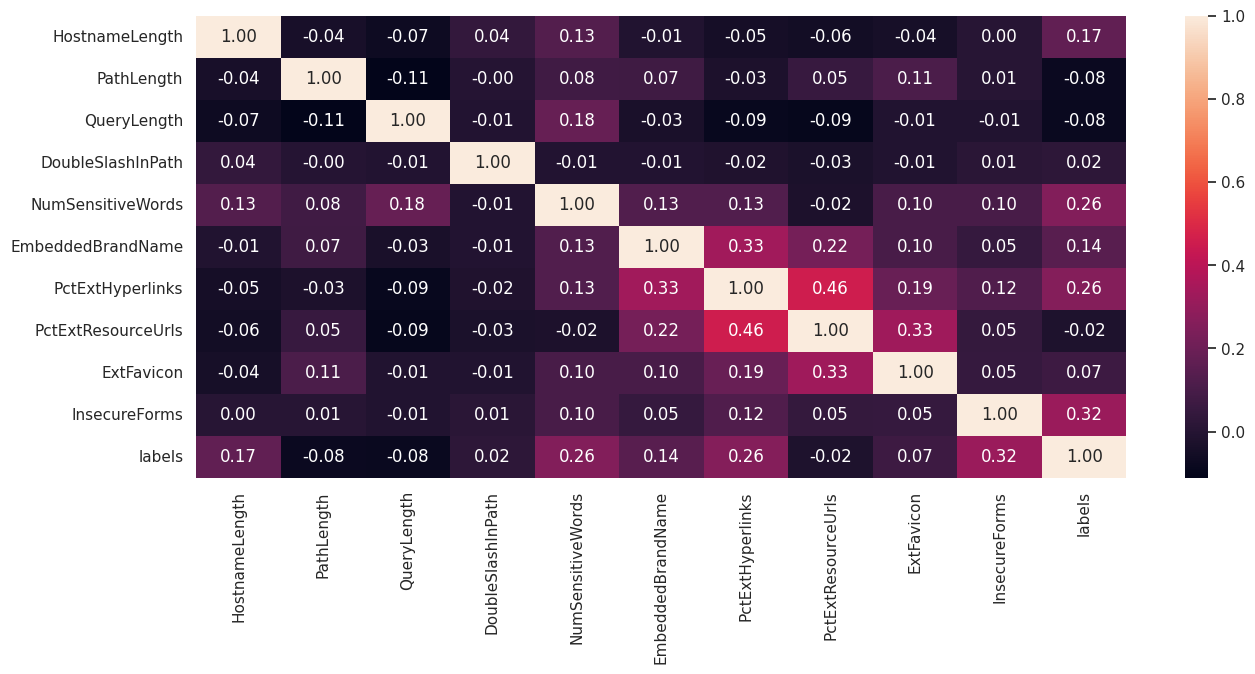

In [39]:
corr_heatmap(df, 20, 30)

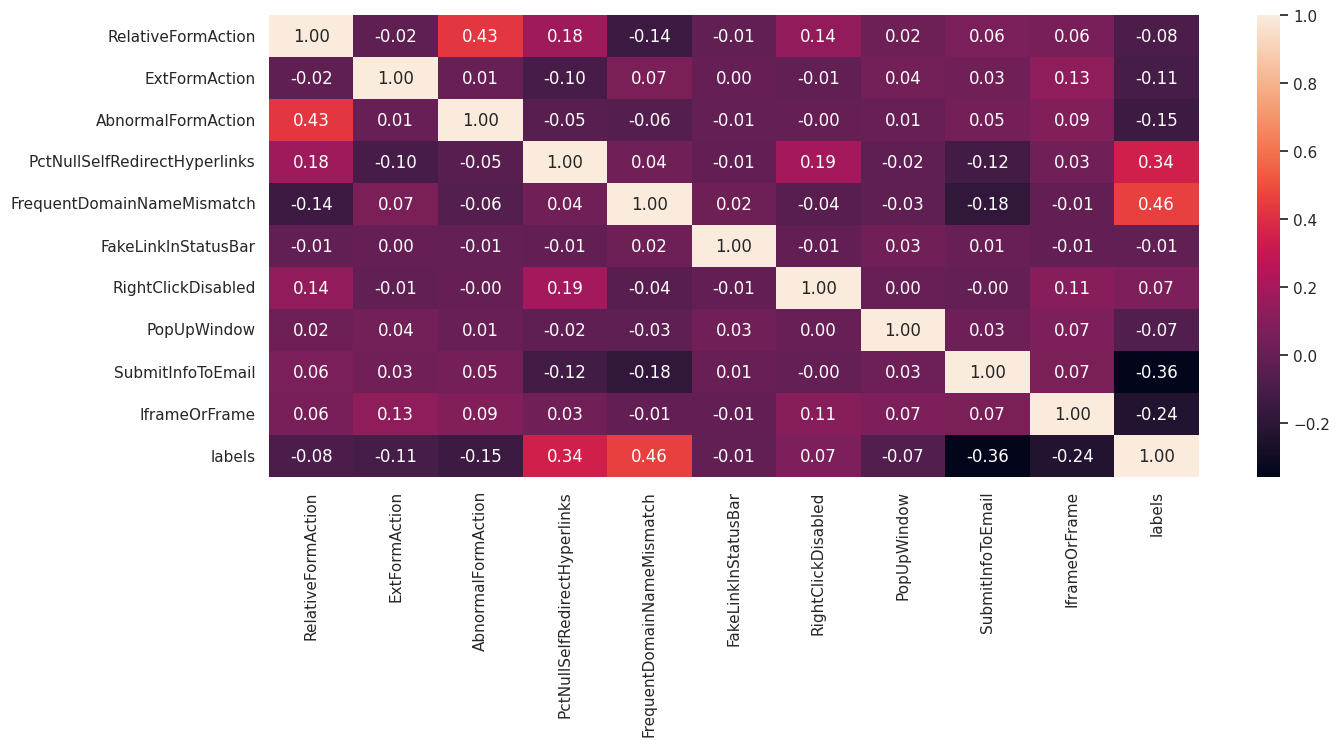

In [40]:
corr_heatmap(df, 30, 40)

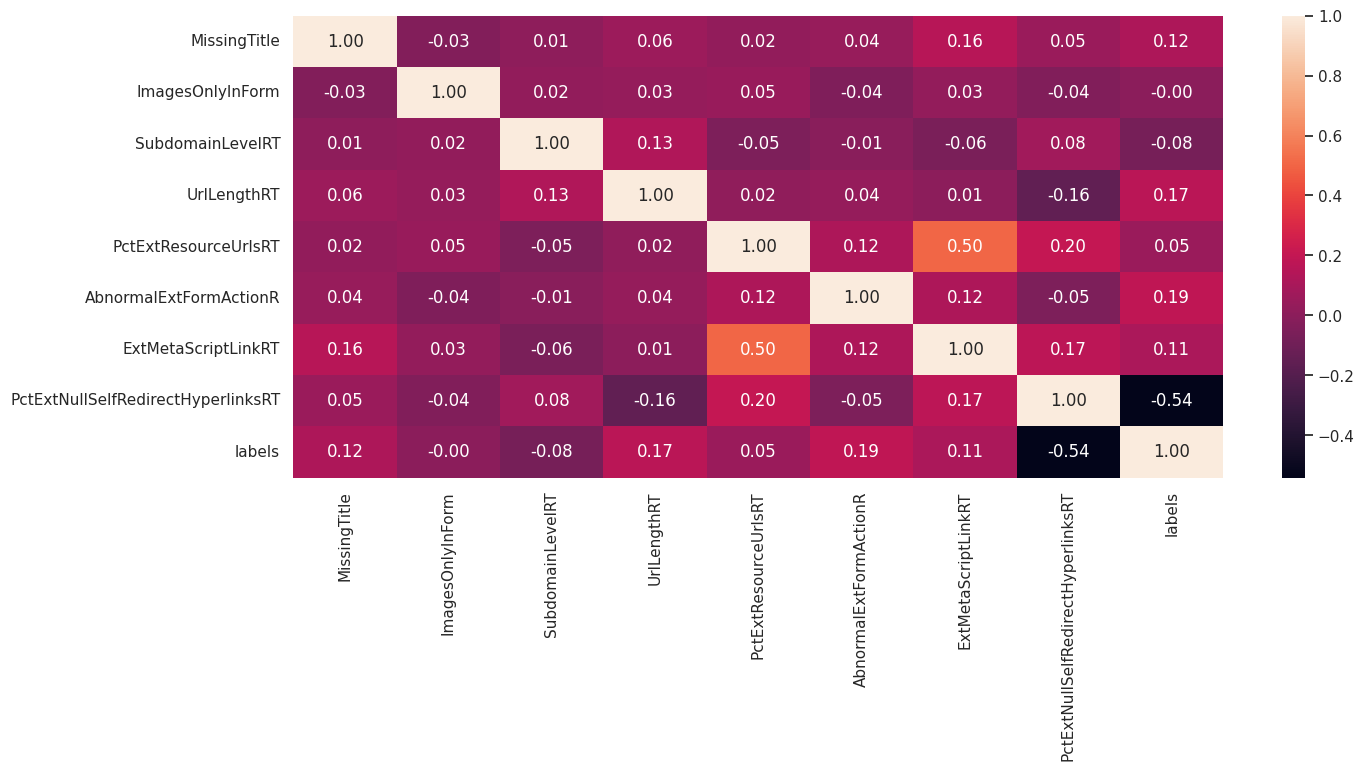

In [41]:
corr_heatmap(df, 40, 50)

In [42]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('labels', axis =1)
y = df['labels']

discrete_features = X.dtypes == int

**Features Extraction**

In [43]:
mi_score = mutual_info_classif(X, y, discrete_features = discrete_features)
mi_score = pd.Series(mi_score, name = "MI score", index = X.columns)
mi_score = mi_score.sort_values(ascending = False)
mi_score

PctExtHyperlinks                      0.471936
PctExtResourceUrls                    0.295878
PctNullSelfRedirectHyperlinks         0.235585
PctExtNullSelfRedirectHyperlinksRT    0.215053
FrequentDomainNameMismatch            0.130648
NumNumericChars                       0.126462
ExtMetaScriptLinkRT                   0.118677
NumDash                               0.110282
SubmitInfoToEmail                     0.074359
NumDots                               0.068346
InsecureForms                         0.059940
PathLevel                             0.052266
PathLength                            0.052231
UrlLength                             0.045995
NumSensitiveWords                     0.043238
QueryLength                           0.038148
PctExtResourceUrlsRT                  0.037386
NumQueryComponents                    0.034368
IframeOrFrame                         0.026752
NumAmpersand                          0.024720
HostnameLength                        0.024611
NumDashInHost

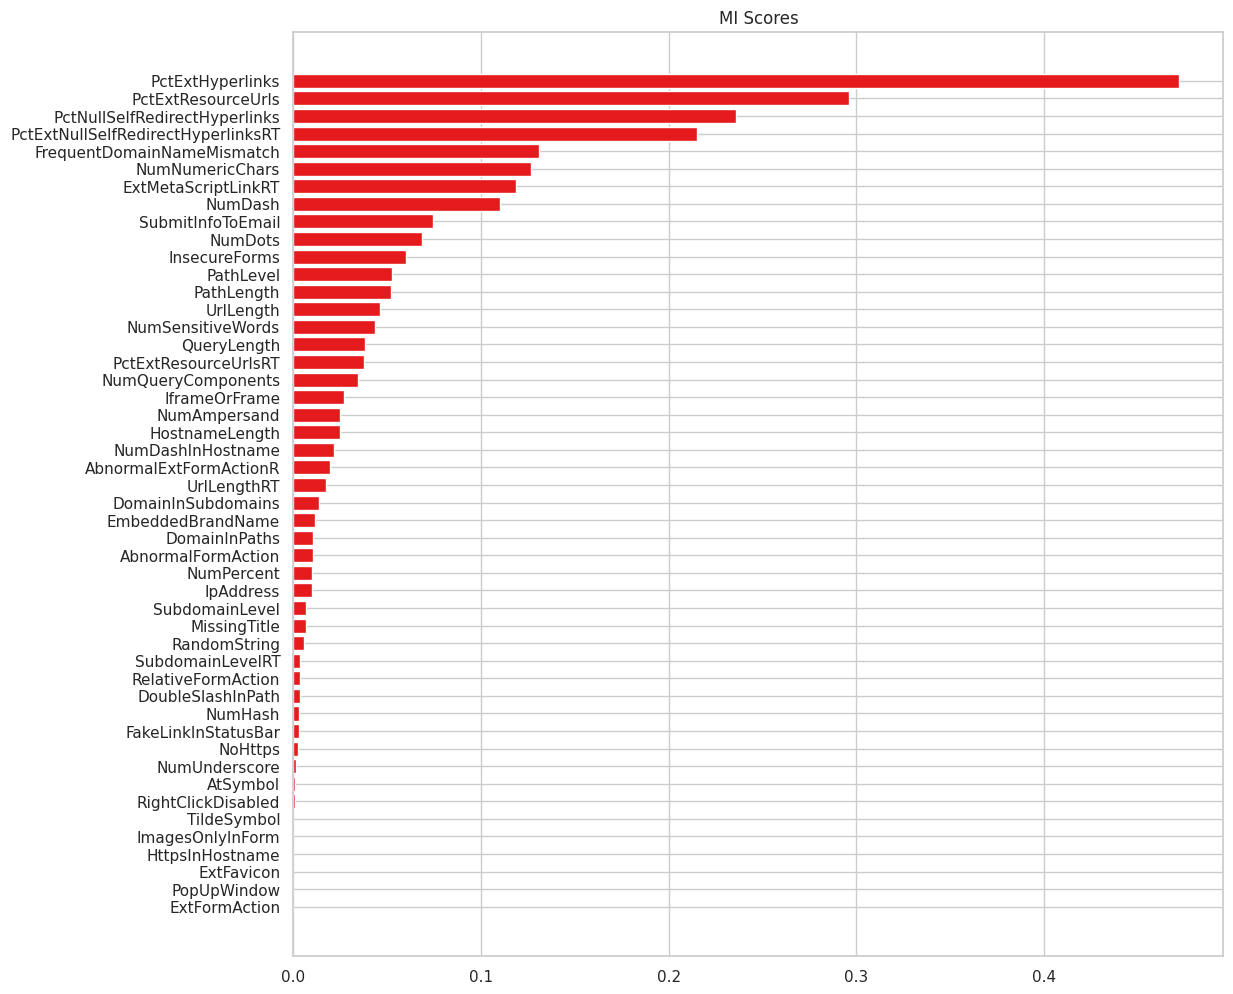

In [44]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")

plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_score)

In [45]:
!pip install --upgrade pip
!pip install cuml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cuml
  Running setup.py clean for cuml
Failed to build cuml
ERROR: Could not build wheels for cuml, which is required to install pyproject.toml-based projects


In [46]:
!git clone https://github.com/rapidsai/cuml.git


Cloning into 'cuml'...
remote: Enumerating objects: 128541, done.
remote: Counting objects: 100% (1513/1513), done.
remote: Compressing objects: 100% (767/767), done.
remote: Total 128541 (delta 894), reused 1241 (delta 709), pack-reused 127028
Receiving objects: 100% (128541/128541), 154.18 MiB | 23.04 MiB/s, done.
Resolving deltas: 100% (98267/98267), done.


In [47]:
!pip install --upgrade pip
!pip install cuml

  Using cached cuml-0.6.1.post1.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cuml
  Running setup.py clean for cuml
Failed to build cuml
ERROR: Could not build wheels for cuml, which is required to install pyproject.toml-based projects


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [49]:
def train_logistic(data, top_n):
    top_n_features = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy


In [50]:
arr = []
for i in range(20,51):
    precision, recall, f1, accuracy = train_logistic(df, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])



Performance for Logistic Model with Top 20 features is precision : 0.907, recall : 0.9438085327783559, f1 score : 0.9250382457929627, accuracy : 0.9265
Performance for Logistic Model with Top 21 features is precision : 0.900883218842002, recall : 0.9282103134479271, f1 score : 0.9143426294820718, accuracy : 0.914
Performance for Logistic Model with Top 22 features is precision : 0.9146919431279621, recall : 0.9225621414913958, f1 score : 0.9186101856258924, accuracy : 0.9145
Performance for Logistic Model with Top 23 features is precision : 0.9005847953216374, recall : 0.9323915237134208, f1 score : 0.9162121963311849, accuracy : 0.9155
Performance for Logistic Model with Top 24 features is precision : 0.9065606361829026, recall : 0.9519832985386222, f1 score : 0.9287169042769858, accuracy : 0.93
Performance for Logistic Model with Top 25 features is precision : 0.9026465028355387, recall : 0.9408866995073891, f1 score : 0.9213699951760733, accuracy : 0.9185
Performance for Logistic Mo

In [51]:

df_log = pd.DataFrame(arr, columns = ['Number of feature', 'precisions', 'recall', 'f1-score', 'accuracy'])
df_log

Number of feature  precisions   recall   f1-score  accuracy
0          20           0.907000   0.943809  0.925038   0.9265 
1          21           0.900883   0.928210  0.914343   0.9140 
2          22           0.914692   0.922562  0.918610   0.9145 
3          23           0.900585   0.932392  0.916212   0.9155 
4          24           0.906561   0.951983  0.928717   0.9300 
5          25           0.902647   0.940887  0.921370   0.9185 
6          26           0.909709   0.935130  0.922244   0.9210 
7          27           0.909722   0.938588  0.923929   0.9245 
8          28           0.912366   0.952236  0.931875   0.9315 
9          29           0.911417   0.937247  0.924152   0.9240 
10         30           0.903101   0.945233  0.923687   0.9230 
11         31           0.918191   0.954000  0.935753   0.9345 
12         32           0.910419   0.943491  0.926660   0.9260 
13         33           0.913088   0.933124  0.922997   0.9255 
14         34           0.915408   0.944906  0.929923   0.9315 
15         35           0.927794   0.937063  0.932406   0.9320 
16         36           0.929756   0.939842  0.934772   0.9335 
17         37           0.916418   0.944615  0.930303   0.9310 
18         38           0.926148   0.944049  0.935013   0.9355 
19         39           0.923762   0.931138  0.927435   0.9270 
20         40           0.905679   0.937251  0.921194   0.9195 
21         41           0.933788   0.945759  0.939735   0.9385 
22         42           0.928571   0.939112  0.933812   0.9355 
23         43           0.921663   0.936149  0.928850   0.9270 
24         44           0.936326   0.945205  0.940745   0.9435 
25         45           0.918443   0.947419  0.932706   0.9285 
26         46           0.917404   0.946247  0.931603   0.9315 
27         47           0.938614   0.934911  0.936759   0.9360 
28         48           0.930187   0.952669  0.941294   0.9410 
29         49           0.929469   0.941292  0.935343   0.9335 
30         50           0.905966   0.941176  0.923235   0.9255

<Axes: xlabel='Number of feature', ylabel='precisions'>

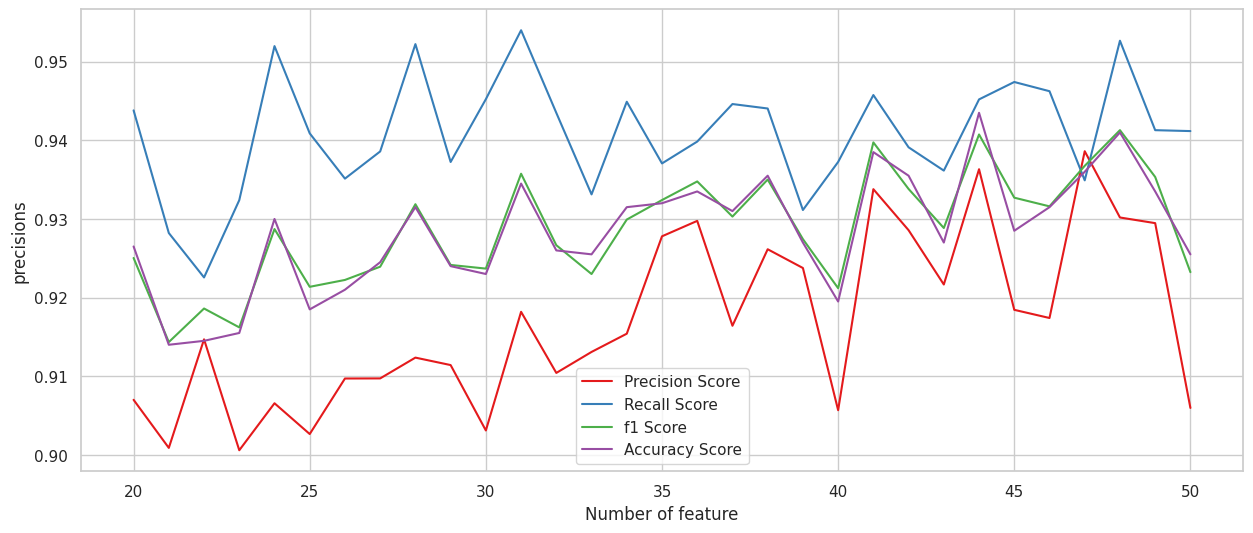

In [52]:
sns.lineplot(x = 'Number of feature', y = 'precisions', data = df_log, label = 'Precision Score')
sns.lineplot(x = 'Number of feature', y = 'recall', data = df_log, label = 'Recall Score')
sns.lineplot(x = 'Number of feature', y = 'f1-score', data = df_log, label = 'f1 Score')
sns.lineplot(x = 'Number of feature', y = 'accuracy', data = df_log, label = 'Accuracy Score')

In [53]:
def train_rfc(data, top_n):
    top_n_features = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
    rfc = RandomForestClassifier(n_estimators=500,
                criterion='entropy',
                max_depth=32,
                max_features=1.0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy


In [54]:
arr1 = []
for i in range(20,51):
    precision, recall, f1, accuracy = train_rfc(df, i)
    print("Performance for RandomForestClassifier Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr1.append([i, precision, recall, f1, accuracy])



Performance for RandomForestClassifier Model with Top 20 features is precision : 0.9683301343570058, recall : 0.9777131782945736, f1 score : 0.9729990356798458, accuracy : 0.972
Performance for RandomForestClassifier Model with Top 21 features is precision : 0.9882583170254403, recall : 0.9844054580896686, f1 score : 0.9863281250000001, accuracy : 0.986
Performance for RandomForestClassifier Model with Top 22 features is precision : 0.9755849440488301, recall : 0.9696663296258847, f1 score : 0.9726166328600406, accuracy : 0.973
Performance for RandomForestClassifier Model with Top 23 features is precision : 0.971830985915493, recall : 0.9767441860465116, f1 score : 0.9742813918305597, accuracy : 0.9745
Performance for RandomForestClassifier Model with Top 24 features is precision : 0.9780658025922233, recall : 0.98001998001998, f1 score : 0.9790419161676647, accuracy : 0.979
Performance for RandomForestClassifier Model with Top 25 features is precision : 0.980980980980981, recall : 0.9

In [55]:
df_rfc = pd.DataFrame(arr1, columns = ['Number of feature', 'precisions', 'recall', 'f1-score', 'accuracy'])
df_rfc

Number of feature  precisions   recall   f1-score  accuracy
0          20           0.968330   0.977713  0.972999   0.9720 
1          21           0.988258   0.984405  0.986328   0.9860 
2          22           0.975585   0.969666  0.972617   0.9730 
3          23           0.971831   0.976744  0.974281   0.9745 
4          24           0.978066   0.980020  0.979042   0.9790 
5          25           0.980981   0.972222  0.976582   0.9765 
6          26           0.972533   0.980513  0.976507   0.9770 
7          27           0.978368   0.982231  0.980296   0.9800 
8          28           0.980671   0.966901  0.973737   0.9740 
9          29           0.982528   0.969574  0.976008   0.9765 
10         30           0.975100   0.973161  0.974129   0.9740 
11         31           0.973581   0.975490  0.974535   0.9740 
12         32           0.983822   0.978873  0.981341   0.9815 
13         33           0.976447   0.983202  0.979813   0.9795 
14         34           0.971859   0.980730  0.976275   0.9765 
15         35           0.981557   0.983573  0.982564   0.9830 
16         36           0.985030   0.983068  0.984048   0.9840 
17         37           0.977889   0.985816  0.981837   0.9820 
18         38           0.977845   0.972946  0.975389   0.9755 
19         39           0.976861   0.976861  0.976861   0.9770 
20         40           0.980060   0.977137  0.978596   0.9785 
21         41           0.974232   0.978109  0.976167   0.9760 
22         42           0.983034   0.977183  0.980100   0.9800 
23         43           0.971173   0.979940  0.975537   0.9755 
24         44           0.983657   0.986680  0.985166   0.9855 
25         45           0.989076   0.981281  0.985163   0.9850 
26         46           0.976721   0.983690  0.980193   0.9805 
27         47           0.975418   0.979269  0.977340   0.9770 
28         48           0.981538   0.982546  0.982042   0.9825 
29         49           0.972495   0.981169  0.976813   0.9765 
30         50           0.984267   0.978495  0.981373   0.9810

<Axes: xlabel='Number of feature', ylabel='precisions'>

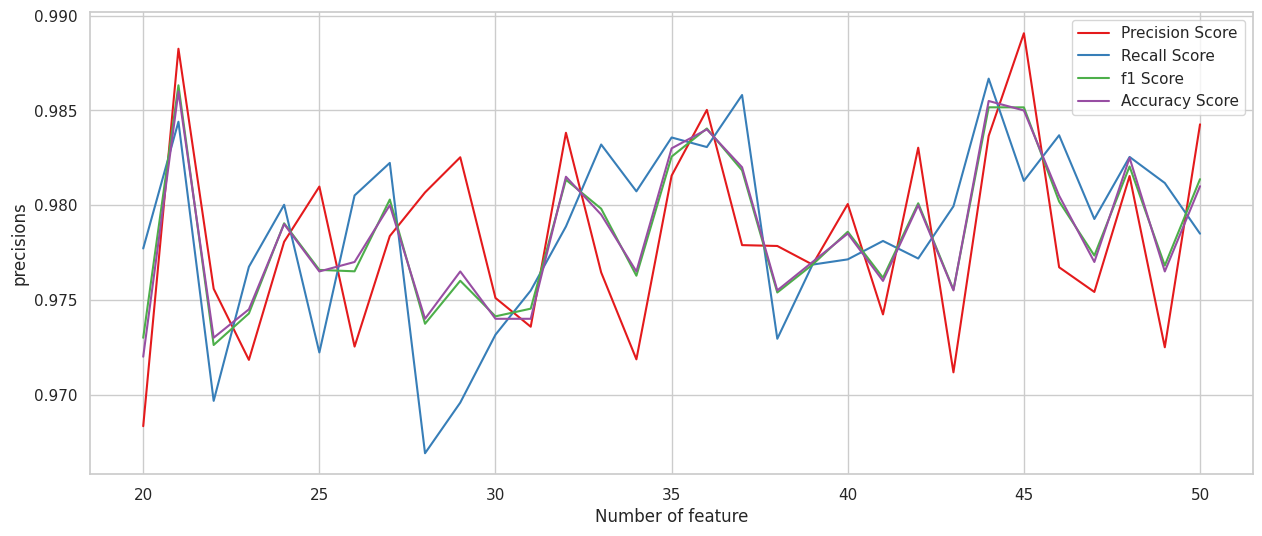

In [56]:
sns.lineplot(x = 'Number of feature', y = 'precisions', data = df_rfc, label = 'Precision Score')
sns.lineplot(x = 'Number of feature', y = 'recall', data = df_rfc, label = 'Recall Score')
sns.lineplot(x = 'Number of feature', y = 'f1-score', data = df_rfc, label = 'f1 Score')
sns.lineplot(x = 'Number of feature', y = 'accuracy', data = df_rfc, label = 'Accuracy Score')

In [57]:
top_n_features = mi_score.sort_values(ascending=False).head(36).index.tolist()
X = df[top_n_features]
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
rfc = RandomForestClassifier(n_estimators=500,
            criterion='entropy',
            max_depth=32,
            max_features=1.0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [58]:
print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(36, precision, recall, f1, accuracy))

Performance for RFC Model with Top 36 features is precision : 0.9798792756539235, recall : 0.9858299595141701, f1 score : 0.9828456104944501, accuracy : 0.983


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1012
           1       0.98      0.99      0.98       988

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

[[992  20]
 [ 14 974]]
